# Introduction to Data Analysis with Python II


<img src="https://www.python.org/static/img/python-logo.png" alt="yogen" style="width: 200px; float: right;"/>
<br>
<br>
<br>
<img src="../assets/yogen-logo.png" alt="yogen" style="width: 200px; float: right;"/>

## Data Wrangling: Clean, Transform, Merge, Reshape

!pip install pandas matplotlib

!pip install tqdm

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('seaborn')
%matplotlib inline

## Combining and merging data sets

### Database-style DataFrame merges

In [2]:
# Vamos a cruzar tablas como haría una DB
left = pd.DataFrame({'data1' : np.random.randint(100, 200, 8), 'key' : list('bacbaacb')})
right = pd.DataFrame({'data2' : np.random.randint(100, 200, 7), 'key' : list('acaacdd')})
left, right

(   data1 key
 0    144   b
 1    196   a
 2    164   c
 3    120   b
 4    154   a
 5    185   a
 6    122   c
 7    161   b,
    data2 key
 0    198   a
 1    171   c
 2    159   a
 3    170   a
 4    141   c
 5    123   d
 6    127   d)

**how : {'left', 'right', 'outer', 'inner'}, default 'inner'**
    * left: use only keys from left frame, similar to a SQL left outer join;
      preserve key order
    * right: use only keys from right frame, similar to a SQL right outer join;
      preserve key order
    * outer: use union of keys from both frames, similar to a SQL full outer
      join; sort keys lexicographically
    * inner: use intersection of keys from both frames, similar to a SQL inner
      join; preserve the order of the left keys

In [3]:
# Inner join: Une cada 'a' de left con cada 'a' de right (9) + "b's" (0) + "c's" (4) + "d's" (0) = 13 filas
left.merge(right)

,data1,key,data2
0,196,a,198
1,196,a,159
2,196,a,170
3,154,a,198
4,154,a,159
5,154,a,170
6,185,a,198
7,185,a,159
8,185,a,170
9,164,c,171


By default, .merge() performs an [inner join](https://www.w3schools.com/sql/sql_join.asp) between the DataFrames, using the common columns as keys.

In [4]:
# Outer join: Une, SI LO HAY cada 'key' de right con cada 'key' de left:
# "a's" (9) + "b's" (0) + "c's" (4) + "d's" (2) = 15 # filas,
# pero si no lo hay, pone un NAN -> total 9+4+2=15 filas
left.merge(right, how='right')

,data1,key,data2
0,196.0,a,198
1,154.0,a,198
2,185.0,a,198
3,196.0,a,159
4,154.0,a,159
5,185.0,a,159
6,196.0,a,170
7,154.0,a,170
8,185.0,a,170
9,164.0,c,171


In [5]:
left.merge(right, how='left')

,data1,key,data2
0,144,b,NaN
1,196,a,198.0
2,196,a,159.0
3,196,a,170.0
4,164,c,171.0
5,164,c,141.0
6,120,b,NaN
7,154,a,198.0
8,154,a,159.0
9,154,a,170.0


That means that it returns the cartesian product of the elements with common keys: if there are duplicates, it will return all the possible combinations:

If the columns to join on don't have the same name, or we want to join on the index of the DataFrames, we'll need to specify that.

In [6]:
right.columns = ['a', 'b']
left.merge(right, left_on=['key'], right_on=['b'])

,data1,key,a,b
0,196,a,198,a
1,196,a,159,a
2,196,a,170,a
3,154,a,198,a
4,154,a,159,a
5,154,a,170,a
6,185,a,198,a
7,185,a,159,a
8,185,a,170,a
9,164,c,171,c


If there are two columns with the same name that we do not join on, both will get transferred to the resulting DataFrame with a suffix. We can customize these suffixes.

In [7]:
right.columns = ['data1', 'key']
left.merge(right, left_on=['key'], right_on=['key'], suffixes=['_chachi', '_piruli'])

,data1_chachi,key,data1_piruli
0,196,a,198
1,196,a,159
2,196,a,170
3,154,a,198
4,154,a,159
5,154,a,170
6,185,a,198
7,185,a,159
8,185,a,170
9,164,c,171


### Merging on index

In [8]:
right.index = list('abdoier')
right

,data1,key
a,198,a
b,171,c
d,159,a
o,170,a
i,141,c
e,123,d
r,127,d


In [9]:
left.merge(right, left_on='key', right_index=True, how='outer')

,key,data1_x,key_x,data1_y,key_y
0.0,b,144.0,b,171.0,c
3.0,b,120.0,b,171.0,c
7.0,b,161.0,b,171.0,c
1.0,a,196.0,a,198.0,a
4.0,a,154.0,a,198.0,a
5.0,a,185.0,a,198.0,a
2.0,c,164.0,c,NaN,NaN
6.0,c,122.0,c,NaN,NaN
NaN,d,NaN,NaN,159.0,a
NaN,o,NaN,NaN,170.0,a


### Concatenating along an axis

In [10]:
left, right

(   data1 key
 0    144   b
 1    196   a
 2    164   c
 3    120   b
 4    154   a
 5    185   a
 6    122   c
 7    161   b,
    data1 key
 a    198   a
 b    171   c
 d    159   a
 o    170   a
 i    141   c
 e    123   d
 r    127   d)

In [11]:
pd.concat([left, right])

,data1,key
0,144,b
1,196,a
2,164,c
3,120,b
4,154,a
5,185,a
6,122,c
7,161,b
a,198,a
b,171,c


In [12]:
pd.concat([left, right], axis=1)

,data1,key,data1,key
0,144.0,b,NaN,NaN
1,196.0,a,NaN,NaN
2,164.0,c,NaN,NaN
3,120.0,b,NaN,NaN
4,154.0,a,NaN,NaN
5,185.0,a,NaN,NaN
6,122.0,c,NaN,NaN
7,161.0,b,NaN,NaN
a,NaN,NaN,198.0,a
b,NaN,NaN,171.0,c


## On Time Performance Table, transtats.

Downloaded from `https://www.transtats.bts.gov/`

### Instructions for download:

Input "On Time Performance" in search box, click on "Airline On-Time Performance Data" from the search results, then on the bottom right corner of "Reporting Carrier On-Time Performance (1987-present)" click "Download". In the next screen, click "Prezipped file", select the period (March and April 2020), and click "Download" once for each period, for a total of 2 zip files.

We only need the `.csv` inside of each of those zipped files.

### Take a look at the beginning of the readme file

using the shell

In [13]:
# # Ejecutar solo la primera vez !!

# # "!unzip -o" se usa para sobreescribir en caso de que ya exista algún archivo
# !unzip "/home/dsc/shared/Clases 7_Estadística y Data Science/On_Time_Reporting_Carrier_On_Time_Performance_1987_present_2020_3.zip"
# !unzip "/home/dsc/shared/Clases 7_Estadística y Data Science/On_Time_Reporting_Carrier_On_Time_Performance_1987_present_2020_4.zip"

In [14]:
!head readme.html

<HTML>
<HEAD>
	<TITLE> readme.html </TITLE>
</HEAD>
<BODY>
	<TABLE><TR><TD COLSPAN=2><H4>BACKGROUND</H4></TD></TR>
	<TR><TD COLSPAN=2>The data contained in the compressed file has been extracted from the 
	Reporting Carrier On-Time Performance (1987-present) data table of the "On-Time" database from the TranStats data library. 
	The time period is indicated in the name of the compressed file; 
	for example, XXX_XXXXX_2001_1 contains data of the first month of the year 2001. </TD></TR>


The readme file is html. Luckily, we are working in an html environment. 

### Display the contents of `readme.html` within the notebook
With [IPython.display.IFrame](https://ipython.org/ipython-doc/3/api/generated/IPython.display.html)

In [15]:
from IPython.display import IFrame

In [16]:
# # TEST: ralentiza mucho, no ejecutar (aunque funcione)

# IFrame('http://elpais.com', 800, 300) # Carga la página de inicio de El País, totalmente activa

In [17]:
IFrame('readme.html', 800, 600)

That's some very good documentation!

The files within the zip are " quoted csv's. They contain information on timeliness of departures in the US, at the departure level.

### Let's load one of the files into memory as a pandas dataframe. What functions do you need to use?

Pro tip: there is no need to decompress the whole file. Check out [zipfile.ZipFile](https://docs.python.org/3/library/zipfile.html)

First, open a connection to one of the files

In [18]:
from zipfile import ZipFile

zfile = ZipFile("/home/dsc/shared/Clases 7_Estadística y Data Science/On_Time_Reporting_Carrier_On_Time_Performance_1987_present_2020_3.zip")
zfile.filelist

[<ZipInfo filename='On_Time_Reporting_Carrier_On_Time_Performance_(1987_present)_2020_3.csv' compress_type=deflate filemode='-rw-r--r--' file_size=284488780 compress_size=30367345>,
 <ZipInfo filename='readme.html' compress_type=deflate filemode='-rw-r--r--' file_size=12152 compress_size=2244>]

In [19]:
csvfile = zfile.open(zfile.filelist[0])
csvfile.readline()

b'"Year","Quarter","Month","DayofMonth","DayOfWeek","FlightDate","Reporting_Airline","DOT_ID_Reporting_Airline","IATA_CODE_Reporting_Airline","Tail_Number","Flight_Number_Reporting_Airline","OriginAirportID","OriginAirportSeqID","OriginCityMarketID","Origin","OriginCityName","OriginState","OriginStateFips","OriginStateName","OriginWac","DestAirportID","DestAirportSeqID","DestCityMarketID","Dest","DestCityName","DestState","DestStateFips","DestStateName","DestWac","CRSDepTime","DepTime","DepDelay","DepDelayMinutes","DepDel15","DepartureDelayGroups","DepTimeBlk","TaxiOut","WheelsOff","WheelsOn","TaxiIn","CRSArrTime","ArrTime","ArrDelay","ArrDelayMinutes","ArrDel15","ArrivalDelayGroups","ArrTimeBlk","Cancelled","CancellationCode","Diverted","CRSElapsedTime","ActualElapsedTime","AirTime","Flights","Distance","DistanceGroup","CarrierDelay","WeatherDelay","NASDelay","SecurityDelay","LateAircraftDelay","FirstDepTime","TotalAddGTime","LongestAddGTime","DivAirportLandings","DivReachedDest","Div

zip_file is a connection to the compressed file, the .zip. We can use it to open a connection to one of the files it contains, which will behave like a normal uncompressed file that we had opened with open()

Now we're ready to load the file into memory as a pandas dataframe. Remember to close the connections to the files!

In [20]:
flights = pd.read_csv(csvfile)
csvfile.close()
zfile.close()

/home/dsc/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3071: DtypeWarning: Columns (48,69,76,77,84) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [21]:
pd.options.display.max_columns = None
flights.sample(5)

# Lo primero que hay que observar es en el nivel de agregación: ¿qué representa cada fila? En este caso, un vuelo

,2020,1,3,9,1.1,2020-03-09,9E,20363,9E.1,N669CA,4677,11433,1143302,31295,DTW,"Detroit, MI",MI,26,Michigan,43,14307,1430705,30721,PVD,"Providence, RI",RI,44,Rhode Island,15,1423,1412,-11.00,0.00,0.00.1,-1,1400-1459,16.00,1428,1552,5.00,1615,1557,-18.00,0.00.2,0.00.3,-2,1600-1659,0.00.4,Unnamed: 48,0.00.5,112.00,105.00,84.00,1.00,615.00,3.1,Unnamed: 56,Unnamed: 57,Unnamed: 58,Unnamed: 59,Unnamed: 60,Unnamed: 61,Unnamed: 62,Unnamed: 63,0,Unnamed: 65,Unnamed: 66,Unnamed: 67,Unnamed: 68,Unnamed: 69,Unnamed: 70,Unnamed: 71,Unnamed: 72,Unnamed: 73,Unnamed: 74,Unnamed: 75,Unnamed: 76,Unnamed: 77,Unnamed: 78,Unnamed: 79,Unnamed: 80,Unnamed: 81,Unnamed: 82,Unnamed: 83,Unnamed: 84,Unnamed: 85,Unnamed: 86,Unnamed: 87,Unnamed: 88,Unnamed: 89,Unnamed: 90,Unnamed: 91,Unnamed: 92,Unnamed: 93,Unnamed: 94,Unnamed: 95,Unnamed: 96,Unnamed: 97,Unnamed: 98,Unnamed: 99,Unnamed: 100,Unnamed: 101,Unnamed: 102,Unnamed: 103,Unnamed: 104,Unnamed: 105,Unnamed: 106,Unnamed: 107,Unnamed: 108,Unnamed: 109
138522,2020,1,3,6,5,2020-03-06,B6,20409,B6,N236JB,1384,14492,1449202,34492,RDU,"Raleigh/Durham, NC",NC,37,North Carolina,36,10721,1072102,30721,BOS,"Boston, MA",MA,25,Massachusetts,13,1126,1120.0,-6.0,0.0,0.0,-1.0,1100-1159,25.0,1145.0,1304.0,11.0,1321,1315.0,-6.0,0.0,0.0,-1.0,1300-1359,0.0,NaN,0.0,115.0,115.0,79.0,1.0,612.0,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
544004,2020,1,3,16,1,2020-03-16,OO,20304,OO,N773SK,3209,11298,1129806,30194,DFW,"Dallas/Fort Worth, TX",TX,48,Texas,74,11111,1111105,32474,COU,"Columbia, MO",MO,29,Missouri,64,1225,1225.0,0.0,0.0,0.0,0.0,1200-1259,23.0,1248.0,1359.0,4.0,1409,1403.0,-6.0,0.0,0.0,-1.0,1400-1459,0.0,NaN,0.0,104.0,98.0,71.0,1.0,489.0,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
45997,2020,1,3,30,1,2020-03-30,AA,19805,AA,NaN,2553,13487,1348702,31650,MSP,"Minneapolis, MN",MN,27,Minnesota,63,11057,1105703,31057,CLT,"Charlotte, NC",NC,37,North Carolina,36,1020,NaN,NaN,NaN,NaN,NaN,1000-1059,NaN,NaN,NaN,NaN,1350,NaN,NaN,NaN,NaN,NaN,1300-1359,1.0,D,0.0,150.0,NaN,NaN,1.0,930.0,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
109722,2020,1,3,5,4,2020-03-05,AS,19930,AS,N284AK,1809,14771,1477104,32457,SFO,"San Francisco, CA",CA,6,California,91,14747,1474703,30559,SEA,"Seattle, WA",WA,53,Washington,93,1500,1448.0,-12.0,0.0,0.0,-1.0,1500-1559,33.0,1521.0,1648.0,14.0,1719,1702.0,-17.0,0.0,0.0,-2.0,1700-1759,0.0,NaN,0.0,139.0,134.0,87.0,1.0,679.0,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
150950,2020,1,3,22,7,2020-03-22,B6,20409,B6,N662JB,221,10721,1072102,30721,BOS,"Boston, MA",MA,25,Massachusetts,13,14027,1402702,34027,PBI,"West Palm Beach/Palm Beach, FL",FL,12,Florida,33,2104,2122.0,18.0,18.0,1.0,1.0,2100-2159,17.0,2139.0,29.0,6.0,23,35.0,12.0,12.0,0.0,0.0,0001-0559,0.0,NaN,0.0,199.0,193.0,170.0,1.0,1197.0,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


#### Exercise

Load both March 2020 and April 2020 into a single DataFrame

***TRUCO***: para monitorizar un proceso, utilizar la combinación de los módulos `tqdm` y `time`

In [22]:
import tqdm
import time

In [23]:
x = 0
for thing in tqdm.tqdm(range(100)):
    time.sleep(.01)
    x += thing
x  

100%|██████████| 100/100 [00:01<00:00, 89.71it/s]


4950

In [24]:
# Intento propio (funciona):
zfile1 = ZipFile("/home/dsc/shared/Clases 7_Estadística y Data Science/On_Time_Reporting_Carrier_On_Time_Performance_1987_present_2020_3.zip")
csvfile1 = zfile1.open(zfile1.filelist[0])
flights1 = pd.read_csv(csvfile1)
zfile2 = ZipFile("/home/dsc/shared/Clases 7_Estadística y Data Science/On_Time_Reporting_Carrier_On_Time_Performance_1987_present_2020_4.zip")
csvfile2 = zfile2.open(zfile2.filelist[0])
flights2 = pd.read_csv(csvfile2)
flights = pd.concat([flights1, flights2], ignore_index=True, sort=False)
csvfile1.close()
zfile1.close()
csvfile2.close()
zfile2.close()

/home/dsc/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3071: DtypeWarning: Columns (48,69,76,77,84) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,
/home/dsc/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3071: DtypeWarning: Columns (69,76,77,84) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [25]:
flights.head(10)

,Year,Quarter,Month,DayofMonth,DayOfWeek,FlightDate,Reporting_Airline,DOT_ID_Reporting_Airline,IATA_CODE_Reporting_Airline,Tail_Number,Flight_Number_Reporting_Airline,OriginAirportID,OriginAirportSeqID,OriginCityMarketID,Origin,OriginCityName,OriginState,OriginStateFips,OriginStateName,OriginWac,DestAirportID,DestAirportSeqID,DestCityMarketID,Dest,DestCityName,DestState,DestStateFips,DestStateName,DestWac,CRSDepTime,DepTime,DepDelay,DepDelayMinutes,DepDel15,DepartureDelayGroups,DepTimeBlk,TaxiOut,WheelsOff,WheelsOn,TaxiIn,CRSArrTime,ArrTime,ArrDelay,ArrDelayMinutes,ArrDel15,ArrivalDelayGroups,ArrTimeBlk,Cancelled,CancellationCode,Diverted,CRSElapsedTime,ActualElapsedTime,AirTime,Flights,Distance,DistanceGroup,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay,FirstDepTime,TotalAddGTime,LongestAddGTime,DivAirportLandings,DivReachedDest,DivActualElapsedTime,DivArrDelay,DivDistance,Div1Airport,Div1AirportID,Div1AirportSeqID,Div1WheelsOn,Div1TotalGTime,Div1LongestGTime,Div1WheelsOff,Div1TailNum,Div2Airport,Div2AirportID,Div2AirportSeqID,Div2WheelsOn,Div2TotalGTime,Div2LongestGTime,Div2WheelsOff,Div2TailNum,Div3Airport,Div3AirportID,Div3AirportSeqID,Div3WheelsOn,Div3TotalGTime,Div3LongestGTime,Div3WheelsOff,Div3TailNum,Div4Airport,Div4AirportID,Div4AirportSeqID,Div4WheelsOn,Div4TotalGTime,Div4LongestGTime,Div4WheelsOff,Div4TailNum,Div5Airport,Div5AirportID,Div5AirportSeqID,Div5WheelsOn,Div5TotalGTime,Div5LongestGTime,Div5WheelsOff,Div5TailNum,Unnamed: 109
0,2020,1,3,9,1,2020-03-09,9E,20363,9E,N669CA,4677,11433,1143302,31295,DTW,"Detroit, MI",MI,26,Michigan,43,14307,1430705,30721,PVD,"Providence, RI",RI,44,Rhode Island,15,1423,1412.0,-11.0,0.0,0.0,-1.0,1400-1459,16.0,1428.0,1552.0,5.0,1615,1557.0,-18.0,0.0,0.0,-2.0,1600-1659,0.0,NaN,0.0,112.0,105.0,84.0,1.0,615.0,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2020,1,3,9,1,2020-03-09,9E,20363,9E,N669CA,4677,14307,1430705,30721,PVD,"Providence, RI",RI,44,Rhode Island,15,11433,1143302,31295,DTW,"Detroit, MI",MI,26,Michigan,43,1650,1646.0,-4.0,0.0,0.0,-1.0,1600-1659,18.0,1704.0,1846.0,7.0,1909,1853.0,-16.0,0.0,0.0,-2.0,1900-1959,0.0,NaN,0.0,139.0,127.0,102.0,1.0,615.0,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2020,1,3,7,6,2020-03-07,9E,20363,9E,N980EV,4678,11433,1143302,31295,DTW,"Detroit, MI",MI,26,Michigan,43,15380,1538005,35380,TVC,"Traverse City, MI",MI,26,Michigan,43,1544,1539.0,-5.0,0.0,0.0,-1.0,1500-1559,12.0,1551.0,1633.0,3.0,1658,1636.0,-22.0,0.0,0.0,-2.0,1600-1659,0.0,NaN,0.0,74.0,57.0,42.0,1.0,207.0,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2020,1,3,7,6,2020-03-07,9E,20363,9E,N980EV,4678,15380,1538005,35380,TVC,"Traverse City, MI",MI,26,Michigan,43,11433,1143302,31295,DTW,"Detroit, MI",MI,26,Michigan,43,1759,1743.0,-16.0,0.0,0.0,-2.0,1700-1759,11.0,1754.0,1829.0,10.0,1921,1839.0,-42.0,0.0,0.0,-2.0,1900-1959,0.0,NaN,0.0,82.0,56.0,35.0,1.0,207.0,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2020,1,3,7,6,2020-03-07,9E,20363,9E,N836AY,4680,10469,1046902,30469,AZO,"Kalamazoo, MI",MI,26,Michigan,43,11433,1143302,31295,DTW,"Detroit, MI",MI,26,Michigan,43,1349,1344.0,-5.0,0.0,0.0,-1.0,1300-1359,7.0,1351.0,1421.0,8.0,1454,1429.0,-25.0,0.0,0.0,-2.0,1400-1459,0.0,NaN,0.0,65.0,45.0,30.0,1.0,113.0,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N

In [26]:
flights.tail(10)

,Year,Quarter,Month,DayofMonth,DayOfWeek,FlightDate,Reporting_Airline,DOT_ID_Reporting_Airline,IATA_CODE_Reporting_Airline,Tail_Number,Flight_Number_Reporting_Airline,OriginAirportID,OriginAirportSeqID,OriginCityMarketID,Origin,OriginCityName,OriginState,OriginStateFips,OriginStateName,OriginWac,DestAirportID,DestAirportSeqID,DestCityMarketID,Dest,DestCityName,DestState,DestStateFips,DestStateName,DestWac,CRSDepTime,DepTime,DepDelay,DepDelayMinutes,DepDel15,DepartureDelayGroups,DepTimeBlk,TaxiOut,WheelsOff,WheelsOn,TaxiIn,CRSArrTime,ArrTime,ArrDelay,ArrDelayMinutes,ArrDel15,ArrivalDelayGroups,ArrTimeBlk,Cancelled,CancellationCode,Diverted,CRSElapsedTime,ActualElapsedTime,AirTime,Flights,Distance,DistanceGroup,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay,FirstDepTime,TotalAddGTime,LongestAddGTime,DivAirportLandings,DivReachedDest,DivActualElapsedTime,DivArrDelay,DivDistance,Div1Airport,Div1AirportID,Div1AirportSeqID,Div1WheelsOn,Div1TotalGTime,Div1LongestGTime,Div1WheelsOff,Div1TailNum,Div2Airport,Div2AirportID,Div2AirportSeqID,Div2WheelsOn,Div2TotalGTime,Div2LongestGTime,Div2WheelsOff,Div2TailNum,Div3Airport,Div3AirportID,Div3AirportSeqID,Div3WheelsOn,Div3TotalGTime,Div3LongestGTime,Div3WheelsOff,Div3TailNum,Div4Airport,Div4AirportID,Div4AirportSeqID,Div4WheelsOn,Div4TotalGTime,Div4LongestGTime,Div4WheelsOff,Div4TailNum,Div5Airport,Div5AirportID,Div5AirportSeqID,Div5WheelsOn,Div5TotalGTime,Div5LongestGTime,Div5WheelsOff,Div5TailNum,Unnamed: 109
961601,2020,2,4,1,3,2020-04-01,YX,20452,YX,N746YX,3415,15016,1501606,31123,STL,"St. Louis, MO",MO,29,Missouri,64,11292,1129202,30325,DEN,"Denver, CO",CO,8,Colorado,82,835,849.0,14.0,14.0,0.0,0.0,0800-0859,8.0,857.0,1000.0,8.0,1009,1008.0,-1.0,0.0,0.0,-1.0,1000-1059,0.0,NaN,0.0,154.0,139.0,123.0,1.0,770.0,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
961602,2020,2,4,1,3,2020-04-01,YX,20452,YX,N635RW,3414,14683,1468305,33214,SAT,"San Antonio, TX",TX,48,Texas,74,11618,1161802,31703,EWR,"Newark, NJ",NJ,34,New Jersey,21,1308,1259.0,-9.0,0.0,0.0,-1.0,1300-1359,9.0,1308.0,1718.0,5.0,1803,1723.0,-40.0,0.0,0.0,-2.0,1800-1859,0.0,NaN,0.0,235.0,204.0,190.0,1.0,1569.0,7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
961603,2020,2,4,1,3,2020-04-01,YX,20452,YX,N740YX,3413,13487,1348702,31650,MSP,"Minneapolis, MN",MN,27,Minnesota,63,12264,1226402,30852,IAD,"Washington, DC",VA,51,Virginia,38,1235,1228.0,-7.0,0.0,0.0,-1.0,1200-1259,9.0,1237.0,1530.0,7.0,1601,1537.0,-24.0,0.0,0.0,-2.0,1600-1659,0.0,NaN,0.0,146.0,129.0,113.0,1.0,908.0,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
961604,2020,2,4,1,3,2020-04-01,YX,20452,YX,N862RW,3412,11066,1106606,31066,CMH,"Columbus, OH",OH,39,Ohio,44,12266,1226603,31453,IAH,"Houston, TX",TX,48,Texas,74,830,NaN,NaN,NaN,NaN,NaN,0800-0859,NaN,NaN,NaN,NaN,1043,NaN,NaN,NaN,NaN,NaN,1000-1059,1.0,D,0.0,193.0,NaN,NaN,1.0,986.0,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
961605,2020,2,4,1,3,2020-04-01,YX,20452,YX,N653RW,3405,11066,1106606,31066,CMH,"Columbus, OH",OH,39,Ohio,44,12264,1226402,30852,IAD,"Washington, DC",VA,51,Virginia,38,615,610.0,-5.0,0.0,0.0,-1.0,0600-0659,16.0,626.0,721.0,5.0,732,726.0,-6.0,0.0,0.0,-1.0,0700-0759,0.0,NaN,0.0,77.0,76.0,55.0,1.0,299.0,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N

Let's start examining the data: show the beginning of the file. How many records does it contain?

In [27]:
flights1.shape, flights2.shape, flights.shape # Está bien!!

((648229, 110), (313382, 110), (961611, 110))

In [28]:
flights.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 961611 entries, 0 to 961610
Columns: 110 entries, Year to Unnamed: 109
dtypes: float64(71), int64(20), object(19)
memory usage: 807.0+ MB


In [29]:
# %%timeit

from zipfile import ZipFile

dfs = []

for name in ['On_Time_Reporting_Carrier_On_Time_Performance_1987_present_2020_3.zip',
             'On_Time_Reporting_Carrier_On_Time_Performance_1987_present_2020_4.zip']:
    zfile = ZipFile(name)
    csv = zfile.open(zfile.filelist[0])
    
    dfs.append(pd.read_csv(csv))
    csv.close()
    zfile.close()

/home/dsc/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3071: DtypeWarning: Columns (48,69,76,77,84) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,
/home/dsc/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3071: DtypeWarning: Columns (69,76,77,84) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [30]:
flights = pd.concat(dfs)

In [31]:
flights.shape

(961611, 110)

In [32]:
flights.head(10)

,Year,Quarter,Month,DayofMonth,DayOfWeek,FlightDate,Reporting_Airline,DOT_ID_Reporting_Airline,IATA_CODE_Reporting_Airline,Tail_Number,Flight_Number_Reporting_Airline,OriginAirportID,OriginAirportSeqID,OriginCityMarketID,Origin,OriginCityName,OriginState,OriginStateFips,OriginStateName,OriginWac,DestAirportID,DestAirportSeqID,DestCityMarketID,Dest,DestCityName,DestState,DestStateFips,DestStateName,DestWac,CRSDepTime,DepTime,DepDelay,DepDelayMinutes,DepDel15,DepartureDelayGroups,DepTimeBlk,TaxiOut,WheelsOff,WheelsOn,TaxiIn,CRSArrTime,ArrTime,ArrDelay,ArrDelayMinutes,ArrDel15,ArrivalDelayGroups,ArrTimeBlk,Cancelled,CancellationCode,Diverted,CRSElapsedTime,ActualElapsedTime,AirTime,Flights,Distance,DistanceGroup,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay,FirstDepTime,TotalAddGTime,LongestAddGTime,DivAirportLandings,DivReachedDest,DivActualElapsedTime,DivArrDelay,DivDistance,Div1Airport,Div1AirportID,Div1AirportSeqID,Div1WheelsOn,Div1TotalGTime,Div1LongestGTime,Div1WheelsOff,Div1TailNum,Div2Airport,Div2AirportID,Div2AirportSeqID,Div2WheelsOn,Div2TotalGTime,Div2LongestGTime,Div2WheelsOff,Div2TailNum,Div3Airport,Div3AirportID,Div3AirportSeqID,Div3WheelsOn,Div3TotalGTime,Div3LongestGTime,Div3WheelsOff,Div3TailNum,Div4Airport,Div4AirportID,Div4AirportSeqID,Div4WheelsOn,Div4TotalGTime,Div4LongestGTime,Div4WheelsOff,Div4TailNum,Div5Airport,Div5AirportID,Div5AirportSeqID,Div5WheelsOn,Div5TotalGTime,Div5LongestGTime,Div5WheelsOff,Div5TailNum,Unnamed: 109
0,2020,1,3,9,1,2020-03-09,9E,20363,9E,N669CA,4677,11433,1143302,31295,DTW,"Detroit, MI",MI,26,Michigan,43,14307,1430705,30721,PVD,"Providence, RI",RI,44,Rhode Island,15,1423,1412.0,-11.0,0.0,0.0,-1.0,1400-1459,16.0,1428.0,1552.0,5.0,1615,1557.0,-18.0,0.0,0.0,-2.0,1600-1659,0.0,NaN,0.0,112.0,105.0,84.0,1.0,615.0,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2020,1,3,9,1,2020-03-09,9E,20363,9E,N669CA,4677,14307,1430705,30721,PVD,"Providence, RI",RI,44,Rhode Island,15,11433,1143302,31295,DTW,"Detroit, MI",MI,26,Michigan,43,1650,1646.0,-4.0,0.0,0.0,-1.0,1600-1659,18.0,1704.0,1846.0,7.0,1909,1853.0,-16.0,0.0,0.0,-2.0,1900-1959,0.0,NaN,0.0,139.0,127.0,102.0,1.0,615.0,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2020,1,3,7,6,2020-03-07,9E,20363,9E,N980EV,4678,11433,1143302,31295,DTW,"Detroit, MI",MI,26,Michigan,43,15380,1538005,35380,TVC,"Traverse City, MI",MI,26,Michigan,43,1544,1539.0,-5.0,0.0,0.0,-1.0,1500-1559,12.0,1551.0,1633.0,3.0,1658,1636.0,-22.0,0.0,0.0,-2.0,1600-1659,0.0,NaN,0.0,74.0,57.0,42.0,1.0,207.0,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2020,1,3,7,6,2020-03-07,9E,20363,9E,N980EV,4678,15380,1538005,35380,TVC,"Traverse City, MI",MI,26,Michigan,43,11433,1143302,31295,DTW,"Detroit, MI",MI,26,Michigan,43,1759,1743.0,-16.0,0.0,0.0,-2.0,1700-1759,11.0,1754.0,1829.0,10.0,1921,1839.0,-42.0,0.0,0.0,-2.0,1900-1959,0.0,NaN,0.0,82.0,56.0,35.0,1.0,207.0,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2020,1,3,7,6,2020-03-07,9E,20363,9E,N836AY,4680,10469,1046902,30469,AZO,"Kalamazoo, MI",MI,26,Michigan,43,11433,1143302,31295,DTW,"Detroit, MI",MI,26,Michigan,43,1349,1344.0,-5.0,0.0,0.0,-1.0,1300-1359,7.0,1351.0,1421.0,8.0,1454,1429.0,-25.0,0.0,0.0,-2.0,1400-1459,0.0,NaN,0.0,65.0,45.0,30.0,1.0,113.0,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N

In [33]:
flights.tail(10)

,Year,Quarter,Month,DayofMonth,DayOfWeek,FlightDate,Reporting_Airline,DOT_ID_Reporting_Airline,IATA_CODE_Reporting_Airline,Tail_Number,Flight_Number_Reporting_Airline,OriginAirportID,OriginAirportSeqID,OriginCityMarketID,Origin,OriginCityName,OriginState,OriginStateFips,OriginStateName,OriginWac,DestAirportID,DestAirportSeqID,DestCityMarketID,Dest,DestCityName,DestState,DestStateFips,DestStateName,DestWac,CRSDepTime,DepTime,DepDelay,DepDelayMinutes,DepDel15,DepartureDelayGroups,DepTimeBlk,TaxiOut,WheelsOff,WheelsOn,TaxiIn,CRSArrTime,ArrTime,ArrDelay,ArrDelayMinutes,ArrDel15,ArrivalDelayGroups,ArrTimeBlk,Cancelled,CancellationCode,Diverted,CRSElapsedTime,ActualElapsedTime,AirTime,Flights,Distance,DistanceGroup,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay,FirstDepTime,TotalAddGTime,LongestAddGTime,DivAirportLandings,DivReachedDest,DivActualElapsedTime,DivArrDelay,DivDistance,Div1Airport,Div1AirportID,Div1AirportSeqID,Div1WheelsOn,Div1TotalGTime,Div1LongestGTime,Div1WheelsOff,Div1TailNum,Div2Airport,Div2AirportID,Div2AirportSeqID,Div2WheelsOn,Div2TotalGTime,Div2LongestGTime,Div2WheelsOff,Div2TailNum,Div3Airport,Div3AirportID,Div3AirportSeqID,Div3WheelsOn,Div3TotalGTime,Div3LongestGTime,Div3WheelsOff,Div3TailNum,Div4Airport,Div4AirportID,Div4AirportSeqID,Div4WheelsOn,Div4TotalGTime,Div4LongestGTime,Div4WheelsOff,Div4TailNum,Div5Airport,Div5AirportID,Div5AirportSeqID,Div5WheelsOn,Div5TotalGTime,Div5LongestGTime,Div5WheelsOff,Div5TailNum,Unnamed: 109
313372,2020,2,4,1,3,2020-04-01,YX,20452,YX,N746YX,3415,15016,1501606,31123,STL,"St. Louis, MO",MO,29,Missouri,64,11292,1129202,30325,DEN,"Denver, CO",CO,8,Colorado,82,835,849.0,14.0,14.0,0.0,0.0,0800-0859,8.0,857.0,1000.0,8.0,1009,1008.0,-1.0,0.0,0.0,-1.0,1000-1059,0.0,NaN,0.0,154.0,139.0,123.0,1.0,770.0,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
313373,2020,2,4,1,3,2020-04-01,YX,20452,YX,N635RW,3414,14683,1468305,33214,SAT,"San Antonio, TX",TX,48,Texas,74,11618,1161802,31703,EWR,"Newark, NJ",NJ,34,New Jersey,21,1308,1259.0,-9.0,0.0,0.0,-1.0,1300-1359,9.0,1308.0,1718.0,5.0,1803,1723.0,-40.0,0.0,0.0,-2.0,1800-1859,0.0,NaN,0.0,235.0,204.0,190.0,1.0,1569.0,7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
313374,2020,2,4,1,3,2020-04-01,YX,20452,YX,N740YX,3413,13487,1348702,31650,MSP,"Minneapolis, MN",MN,27,Minnesota,63,12264,1226402,30852,IAD,"Washington, DC",VA,51,Virginia,38,1235,1228.0,-7.0,0.0,0.0,-1.0,1200-1259,9.0,1237.0,1530.0,7.0,1601,1537.0,-24.0,0.0,0.0,-2.0,1600-1659,0.0,NaN,0.0,146.0,129.0,113.0,1.0,908.0,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
313375,2020,2,4,1,3,2020-04-01,YX,20452,YX,N862RW,3412,11066,1106606,31066,CMH,"Columbus, OH",OH,39,Ohio,44,12266,1226603,31453,IAH,"Houston, TX",TX,48,Texas,74,830,NaN,NaN,NaN,NaN,NaN,0800-0859,NaN,NaN,NaN,NaN,1043,NaN,NaN,NaN,NaN,NaN,1000-1059,1.0,D,0.0,193.0,NaN,NaN,1.0,986.0,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
313376,2020,2,4,1,3,2020-04-01,YX,20452,YX,N653RW,3405,11066,1106606,31066,CMH,"Columbus, OH",OH,39,Ohio,44,12264,1226402,30852,IAD,"Washington, DC",VA,51,Virginia,38,615,610.0,-5.0,0.0,0.0,-1.0,0600-0659,16.0,626.0,721.0,5.0,732,726.0,-6.0,0.0,0.0,-1.0,0700-0759,0.0,NaN,0.0,77.0,76.0,55.0,1.0,299.0,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N

Let's start examining the data: show the beginning of the file. How many records does it contain?

In [34]:
flights.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 961611 entries, 0 to 313381
Columns: 110 entries, Year to Unnamed: 109
dtypes: float64(71), int64(20), object(19)
memory usage: 814.4+ MB


#### Digression

Attention! Be careful not to reassign to reserved words or functions- you will overwrite the variable.

In [35]:
# # Cuidado con asignar palabras reservadas! Luego daría problemas al invocarlas
# flights.mean = 4
# flights.mean()

You can delete the overwritten variable, but you won't get back the original value. If it is an object or function from a module, you'll need to reload() the module, since Python doesn't load again an already imported module if you try to import it. reload() is useful also when you are actively developing your own module and want to load the latest definition of a function into memory.

In [36]:
# # Esto no parece funcionar muy bien, ya que aparece un error de que el kernel "ha muerto"

# del(flights.mean)

# import importlib

# importlib.reload(flights.mean())

# flights.mean()

## Data transformation

### Removing duplicates

In [37]:
left

,data1,key
0,144,b
1,196,a
2,164,c
3,120,b
4,154,a
5,185,a
6,122,c
7,161,b


In [38]:
left.drop_duplicates(subset=['key'])

,data1,key
0,144,b
1,196,a
2,164,c


In [39]:
left.drop_duplicates(subset=['key'], keep='last')

,data1,key
5,185,a
6,122,c
7,161,b


#### Exercise

How many individual airports are there in the OTP data?

How many routes (combinations of origin / destination)

In [40]:
zfileOTP = ZipFile("/home/dsc/Data/us_dot/otp/On_Time_Reporting_Carrier_On_Time_Performance_1987_present_2018_12.zip")
csvfileOTP = zfileOTP.open(zfileOTP.filelist[0])
flightsOTP = pd.read_csv(csvfileOTP)
csvfileOTP.close()
zfileOTP.close()
flightsOTP.head()

/home/dsc/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3071: DtypeWarning: Columns (48,76,77,84) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


,Year,Quarter,Month,DayofMonth,DayOfWeek,FlightDate,Reporting_Airline,DOT_ID_Reporting_Airline,IATA_CODE_Reporting_Airline,Tail_Number,Flight_Number_Reporting_Airline,OriginAirportID,OriginAirportSeqID,OriginCityMarketID,Origin,OriginCityName,OriginState,OriginStateFips,OriginStateName,OriginWac,DestAirportID,DestAirportSeqID,DestCityMarketID,Dest,DestCityName,DestState,DestStateFips,DestStateName,DestWac,CRSDepTime,DepTime,DepDelay,DepDelayMinutes,DepDel15,DepartureDelayGroups,DepTimeBlk,TaxiOut,WheelsOff,WheelsOn,TaxiIn,CRSArrTime,ArrTime,ArrDelay,ArrDelayMinutes,ArrDel15,ArrivalDelayGroups,ArrTimeBlk,Cancelled,CancellationCode,Diverted,CRSElapsedTime,ActualElapsedTime,AirTime,Flights,Distance,DistanceGroup,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay,FirstDepTime,TotalAddGTime,LongestAddGTime,DivAirportLandings,DivReachedDest,DivActualElapsedTime,DivArrDelay,DivDistance,Div1Airport,Div1AirportID,Div1AirportSeqID,Div1WheelsOn,Div1TotalGTime,Div1LongestGTime,Div1WheelsOff,Div1TailNum,Div2Airport,Div2AirportID,Div2AirportSeqID,Div2WheelsOn,Div2TotalGTime,Div2LongestGTime,Div2WheelsOff,Div2TailNum,Div3Airport,Div3AirportID,Div3AirportSeqID,Div3WheelsOn,Div3TotalGTime,Div3LongestGTime,Div3WheelsOff,Div3TailNum,Div4Airport,Div4AirportID,Div4AirportSeqID,Div4WheelsOn,Div4TotalGTime,Div4LongestGTime,Div4WheelsOff,Div4TailNum,Div5Airport,Div5AirportID,Div5AirportSeqID,Div5WheelsOn,Div5TotalGTime,Div5LongestGTime,Div5WheelsOff,Div5TailNum,Unnamed: 109
0,2018,4,12,25,2,2018-12-25,WN,19393,WN,N566WN,1823,13796,1379608,32457,OAK,"Oakland, CA",CA,6,California,91,11884,1188402,31884,GEG,"Spokane, WA",WA,53,Washington,93,1030,1048.0,18.0,18.0,1.0,1.0,1000-1059,12.0,1100.0,1251.0,4.0,1230,1255.0,25.0,25.0,1.0,1.0,1200-1259,0.0,NaN,0.0,120.0,127.0,111.0,1.0,723.0,3,18.0,0.0,7.0,0.0,0.0,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2018,4,12,25,2,2018-12-25,WN,19393,WN,N562WN,982,13796,1379608,32457,OAK,"Oakland, CA",CA,6,California,91,12191,1219102,31453,HOU,"Houston, TX",TX,48,Texas,74,640,638.0,-2.0,0.0,0.0,-1.0,0600-0659,11.0,649.0,1213.0,3.0,1225,1216.0,-9.0,0.0,0.0,-1.0,1200-1259,0.0,NaN,0.0,225.0,218.0,204.0,1.0,1642.0,7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2018,4,12,25,2,2018-12-25,WN,19393,WN,N8611F,1562,13796,1379608,32457,OAK,"Oakland, CA",CA,6,California,91,12191,1219102,31453,HOU,"Houston, TX",TX,48,Texas,74,1710,1710.0,0.0,0.0,0.0,0.0,1700-1759,8.0,1718.0,2245.0,4.0,2250,2249.0,-1.0,0.0,0.0,-1.0,2200-2259,0.0,NaN,0.0,220.0,219.0,207.0,1.0,1642.0,7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2018,4,12,25,2,2018-12-25,WN,19393,WN,N7721E,1687,13796,1379608,32457,OAK,"Oakland, CA",CA,6,California,91,12191,1219102,31453,HOU,"Houston, TX",TX,48,Texas,74,1320,1318.0,-2.0,0.0,0.0,-1.0,1300-1359,9.0,1327.0,1851.0,5.0,1855,1856.0,1.0,1.0,0.0,0.0,1800-1859,0.0,NaN,0.0,215.0,218.0,204.0,1.0,1642.0,7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2018,4,12,25,2,2018-12-25,WN,19393,WN,N218WN,1877,13796,1379608,32457,OAK,"Oakland, CA",CA,6,California,91,12191,1219102,31453,HOU,"Houston, TX",TX,48,Texas,74,955,953.0,-2.0,0.0,0.0,-1.0,0900-0959,12.0,1005.0,1530.0,3.0,1540,1533.0,-7.0,0.0,0.0,-1.0,1500-1559,0.0,NaN,0.0,225.0,220.0,205.0,1.0,1642.0,7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Na

1. How many individual airports are there in the OTP data?

#####  Propio

In [41]:
flightsOTP.columns

Index(['Year', 'Quarter', 'Month', 'DayofMonth', 'DayOfWeek', 'FlightDate',
       'Reporting_Airline', 'DOT_ID_Reporting_Airline',
       'IATA_CODE_Reporting_Airline', 'Tail_Number',
       ...
       'Div4TailNum', 'Div5Airport', 'Div5AirportID', 'Div5AirportSeqID',
       'Div5WheelsOn', 'Div5TotalGTime', 'Div5LongestGTime', 'Div5WheelsOff',
       'Div5TailNum', 'Unnamed: 109'],
      dtype='object', length=110)

In [42]:
flightsOTP.sample(5) # Se descubre que el campo del aeropuerto es la columna "Origin"

,Year,Quarter,Month,DayofMonth,DayOfWeek,FlightDate,Reporting_Airline,DOT_ID_Reporting_Airline,IATA_CODE_Reporting_Airline,Tail_Number,Flight_Number_Reporting_Airline,OriginAirportID,OriginAirportSeqID,OriginCityMarketID,Origin,OriginCityName,OriginState,OriginStateFips,OriginStateName,OriginWac,DestAirportID,DestAirportSeqID,DestCityMarketID,Dest,DestCityName,DestState,DestStateFips,DestStateName,DestWac,CRSDepTime,DepTime,DepDelay,DepDelayMinutes,DepDel15,DepartureDelayGroups,DepTimeBlk,TaxiOut,WheelsOff,WheelsOn,TaxiIn,CRSArrTime,ArrTime,ArrDelay,ArrDelayMinutes,ArrDel15,ArrivalDelayGroups,ArrTimeBlk,Cancelled,CancellationCode,Diverted,CRSElapsedTime,ActualElapsedTime,AirTime,Flights,Distance,DistanceGroup,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay,FirstDepTime,TotalAddGTime,LongestAddGTime,DivAirportLandings,DivReachedDest,DivActualElapsedTime,DivArrDelay,DivDistance,Div1Airport,Div1AirportID,Div1AirportSeqID,Div1WheelsOn,Div1TotalGTime,Div1LongestGTime,Div1WheelsOff,Div1TailNum,Div2Airport,Div2AirportID,Div2AirportSeqID,Div2WheelsOn,Div2TotalGTime,Div2LongestGTime,Div2WheelsOff,Div2TailNum,Div3Airport,Div3AirportID,Div3AirportSeqID,Div3WheelsOn,Div3TotalGTime,Div3LongestGTime,Div3WheelsOff,Div3TailNum,Div4Airport,Div4AirportID,Div4AirportSeqID,Div4WheelsOn,Div4TotalGTime,Div4LongestGTime,Div4WheelsOff,Div4TailNum,Div5Airport,Div5AirportID,Div5AirportSeqID,Div5WheelsOn,Div5TotalGTime,Div5LongestGTime,Div5WheelsOff,Div5TailNum,Unnamed: 109
442253,2018,4,12,21,5,2018-12-21,9E,20363,9E,N200PQ,3292,11423,1142306,31423,DSM,"Des Moines, IA",IA,19,Iowa,61,11433,1143302,31295,DTW,"Detroit, MI",MI,26,Michigan,43,1017,1009.0,-8.0,0.0,0.0,-1.0,1000-1059,12.0,1021.0,1247.0,8.0,1313,1255.0,-18.0,0.0,0.0,-2.0,1300-1359,0.0,NaN,0.0,116.0,106.0,86.0,1.0,533.0,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
519790,2018,4,12,30,7,2018-12-30,AA,19805,AA,N966AN,1232,13204,1320402,31454,MCO,"Orlando, FL",FL,12,Florida,33,13930,1393006,30977,ORD,"Chicago, IL",IL,17,Illinois,41,1019,1326.0,187.0,187.0,1.0,12.0,1000-1059,14.0,1340.0,1503.0,11.0,1224,1514.0,170.0,170.0,1.0,11.0,1200-1259,0.0,NaN,0.0,185.0,168.0,143.0,1.0,1005.0,5,16.0,0.0,0.0,0.0,154.0,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
85971,2018,4,12,13,4,2018-12-13,YX,20452,YX,N857RW,3573,13930,1393006,30977,ORD,"Chicago, IL",IL,17,Illinois,41,11193,1119302,33105,CVG,"Cincinnati, OH",KY,21,Kentucky,52,1753,1745.0,-8.0,0.0,0.0,-1.0,1700-1759,26.0,1811.0,1957.0,10.0,2014,2007.0,-7.0,0.0,0.0,-1.0,2000-2059,0.0,NaN,0.0,81.0,82.0,46.0,1.0,264.0,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
48628,2018,4,12,28,5,2018-12-28,WN,19393,WN,N7815L,6849,13204,1320402,31454,MCO,"Orlando, FL",FL,12,Florida,33,10821,1082106,30852,BWI,"Baltimore, MD",MD,24,Maryland,35,2220,2247.0,27.0,27.0,1.0,1.0,2200-2259,9.0,2256.0,39.0,3.0,25,42.0,17.0,17.0,1.0,1.0,0001-0559,0.0,NaN,0.0,125.0,115.0,103.0,1.0,787.0,4,10.0,0.0,0.0,0.0,7.0,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
506980,2018,4,12,7,5,2018-12-07,AA,19805,AA,N801NN,1048,13303,1330303,32467,MIA,"Miami, FL",FL,12,Florida,33,11278,1127805,30852,DCA,"Washington, DC",VA,51,Virginia,38,830,823.0,-7.0,0.0,0.0,-1.0,0800-0859,17.0,840.0,1049.0,4.0,1058,1053.0,-5.0,0.0,0.0,-1.0,1000-1059,0.0,NaN,0.0,148.0,150.0,129.0,1.0,919.0,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Na

In [43]:
len(flightsOTP['Origin'].unique())

346

In [44]:
len(flightsOTP['Dest'].unique())

346

In [45]:
type(flightsOTP['Dest'])

pandas.core.series.Series

In [46]:
type(flightsOTP['Dest'].unique())

numpy.ndarray

In [47]:
pd.Series(flightsOTP['Dest'].unique())

0      GEG
1      HOU
2      IND
3      LAS
4      LAX
      ... 
341    OME
342    OTZ
343    ADK
344    PSE
345    ORH
Length: 346, dtype: object

In [48]:
len(set(pd.concat([pd.Series(flightsOTP['Origin'].unique()), pd.Series(flightsOTP['Dest'].unique())])))

346

#####  Clase

In [49]:
flights.drop_duplicates(subset=['Origin'])

,Year,Quarter,Month,DayofMonth,DayOfWeek,FlightDate,Reporting_Airline,DOT_ID_Reporting_Airline,IATA_CODE_Reporting_Airline,Tail_Number,Flight_Number_Reporting_Airline,OriginAirportID,OriginAirportSeqID,OriginCityMarketID,Origin,OriginCityName,OriginState,OriginStateFips,OriginStateName,OriginWac,DestAirportID,DestAirportSeqID,DestCityMarketID,Dest,DestCityName,DestState,DestStateFips,DestStateName,DestWac,CRSDepTime,DepTime,DepDelay,DepDelayMinutes,DepDel15,DepartureDelayGroups,DepTimeBlk,TaxiOut,WheelsOff,WheelsOn,TaxiIn,CRSArrTime,ArrTime,ArrDelay,ArrDelayMinutes,ArrDel15,ArrivalDelayGroups,ArrTimeBlk,Cancelled,CancellationCode,Diverted,CRSElapsedTime,ActualElapsedTime,AirTime,Flights,Distance,DistanceGroup,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay,FirstDepTime,TotalAddGTime,LongestAddGTime,DivAirportLandings,DivReachedDest,DivActualElapsedTime,DivArrDelay,DivDistance,Div1Airport,Div1AirportID,Div1AirportSeqID,Div1WheelsOn,Div1TotalGTime,Div1LongestGTime,Div1WheelsOff,Div1TailNum,Div2Airport,Div2AirportID,Div2AirportSeqID,Div2WheelsOn,Div2TotalGTime,Div2LongestGTime,Div2WheelsOff,Div2TailNum,Div3Airport,Div3AirportID,Div3AirportSeqID,Div3WheelsOn,Div3TotalGTime,Div3LongestGTime,Div3WheelsOff,Div3TailNum,Div4Airport,Div4AirportID,Div4AirportSeqID,Div4WheelsOn,Div4TotalGTime,Div4LongestGTime,Div4WheelsOff,Div4TailNum,Div5Airport,Div5AirportID,Div5AirportSeqID,Div5WheelsOn,Div5TotalGTime,Div5LongestGTime,Div5WheelsOff,Div5TailNum,Unnamed: 109
0,2020,1,3,9,1,2020-03-09,9E,20363,9E,N669CA,4677,11433,1143302,31295,DTW,"Detroit, MI",MI,26,Michigan,43,14307,1430705,30721,PVD,"Providence, RI",RI,44,Rhode Island,15,1423,1412.0,-11.0,0.0,0.0,-1.0,1400-1459,16.0,1428.0,1552.0,5.0,1615,1557.0,-18.0,0.0,0.0,-2.0,1600-1659,0.0,NaN,0.0,112.0,105.0,84.0,1.0,615.0,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2020,1,3,9,1,2020-03-09,9E,20363,9E,N669CA,4677,14307,1430705,30721,PVD,"Providence, RI",RI,44,Rhode Island,15,11433,1143302,31295,DTW,"Detroit, MI",MI,26,Michigan,43,1650,1646.0,-4.0,0.0,0.0,-1.0,1600-1659,18.0,1704.0,1846.0,7.0,1909,1853.0,-16.0,0.0,0.0,-2.0,1900-1959,0.0,NaN,0.0,139.0,127.0,102.0,1.0,615.0,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2020,1,3,7,6,2020-03-07,9E,20363,9E,N980EV,4678,15380,1538005,35380,TVC,"Traverse City, MI",MI,26,Michigan,43,11433,1143302,31295,DTW,"Detroit, MI",MI,26,Michigan,43,1759,1743.0,-16.0,0.0,0.0,-2.0,1700-1759,11.0,1754.0,1829.0,10.0,1921,1839.0,-42.0,0.0,0.0,-2.0,1900-1959,0.0,NaN,0.0,82.0,56.0,35.0,1.0,207.0,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2020,1,3,7,6,2020-03-07,9E,20363,9E,N836AY,4680,10469,1046902,30469,AZO,"Kalamazoo, MI",MI,26,Michigan,43,11433,1143302,31295,DTW,"Detroit, MI",MI,26,Michigan,43,1349,1344.0,-5.0,0.0,0.0,-1.0,1300-1359,7.0,1351.0,1421.0,8.0,1454,1429.0,-25.0,0.0,0.0,-2.0,1400-1459,0.0,NaN,0.0,65.0,45.0,30.0,1.0,113.0,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
13,2020,1,3,7,6,2020-03-07,9E,20363,9E,N927EV,4687,12884,1288403,32884,LAN,"Lansing, MI",MI,26,Michigan,43,11433,1143302,31295,DTW,"Detroit, MI",MI,26,Michigan,43,1030,1020.0,-10.0,0.0,0.0,-1.0,1000-1059,11.0,1031.0,1053.0,8.0,1133,1101.0,-32.0,0.0,0.0,-2.0,1100-1159,0.0,NaN,0.0,63.0,41.0,22.0,1.0,74.0,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Na

In [50]:
flights.drop_duplicates(subset=['Dest'])

,Year,Quarter,Month,DayofMonth,DayOfWeek,FlightDate,Reporting_Airline,DOT_ID_Reporting_Airline,IATA_CODE_Reporting_Airline,Tail_Number,Flight_Number_Reporting_Airline,OriginAirportID,OriginAirportSeqID,OriginCityMarketID,Origin,OriginCityName,OriginState,OriginStateFips,OriginStateName,OriginWac,DestAirportID,DestAirportSeqID,DestCityMarketID,Dest,DestCityName,DestState,DestStateFips,DestStateName,DestWac,CRSDepTime,DepTime,DepDelay,DepDelayMinutes,DepDel15,DepartureDelayGroups,DepTimeBlk,TaxiOut,WheelsOff,WheelsOn,TaxiIn,CRSArrTime,ArrTime,ArrDelay,ArrDelayMinutes,ArrDel15,ArrivalDelayGroups,ArrTimeBlk,Cancelled,CancellationCode,Diverted,CRSElapsedTime,ActualElapsedTime,AirTime,Flights,Distance,DistanceGroup,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay,FirstDepTime,TotalAddGTime,LongestAddGTime,DivAirportLandings,DivReachedDest,DivActualElapsedTime,DivArrDelay,DivDistance,Div1Airport,Div1AirportID,Div1AirportSeqID,Div1WheelsOn,Div1TotalGTime,Div1LongestGTime,Div1WheelsOff,Div1TailNum,Div2Airport,Div2AirportID,Div2AirportSeqID,Div2WheelsOn,Div2TotalGTime,Div2LongestGTime,Div2WheelsOff,Div2TailNum,Div3Airport,Div3AirportID,Div3AirportSeqID,Div3WheelsOn,Div3TotalGTime,Div3LongestGTime,Div3WheelsOff,Div3TailNum,Div4Airport,Div4AirportID,Div4AirportSeqID,Div4WheelsOn,Div4TotalGTime,Div4LongestGTime,Div4WheelsOff,Div4TailNum,Div5Airport,Div5AirportID,Div5AirportSeqID,Div5WheelsOn,Div5TotalGTime,Div5LongestGTime,Div5WheelsOff,Div5TailNum,Unnamed: 109
0,2020,1,3,9,1,2020-03-09,9E,20363,9E,N669CA,4677,11433,1143302,31295,DTW,"Detroit, MI",MI,26,Michigan,43,14307,1430705,30721,PVD,"Providence, RI",RI,44,Rhode Island,15,1423,1412.0,-11.0,0.0,0.0,-1.0,1400-1459,16.0,1428.0,1552.0,5.0,1615,1557.0,-18.0,0.0,0.0,-2.0,1600-1659,0.0,NaN,0.0,112.0,105.0,84.0,1.0,615.0,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2020,1,3,9,1,2020-03-09,9E,20363,9E,N669CA,4677,14307,1430705,30721,PVD,"Providence, RI",RI,44,Rhode Island,15,11433,1143302,31295,DTW,"Detroit, MI",MI,26,Michigan,43,1650,1646.0,-4.0,0.0,0.0,-1.0,1600-1659,18.0,1704.0,1846.0,7.0,1909,1853.0,-16.0,0.0,0.0,-2.0,1900-1959,0.0,NaN,0.0,139.0,127.0,102.0,1.0,615.0,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2020,1,3,7,6,2020-03-07,9E,20363,9E,N980EV,4678,11433,1143302,31295,DTW,"Detroit, MI",MI,26,Michigan,43,15380,1538005,35380,TVC,"Traverse City, MI",MI,26,Michigan,43,1544,1539.0,-5.0,0.0,0.0,-1.0,1500-1559,12.0,1551.0,1633.0,3.0,1658,1636.0,-22.0,0.0,0.0,-2.0,1600-1659,0.0,NaN,0.0,74.0,57.0,42.0,1.0,207.0,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,2020,1,3,7,6,2020-03-07,9E,20363,9E,N836AY,4680,11433,1143302,31295,DTW,"Detroit, MI",MI,26,Michigan,43,10469,1046902,30469,AZO,"Kalamazoo, MI",MI,26,Michigan,43,1220,1216.0,-4.0,0.0,0.0,-1.0,1200-1259,15.0,1231.0,1255.0,5.0,1319,1300.0,-19.0,0.0,0.0,-2.0,1300-1359,0.0,NaN,0.0,59.0,44.0,24.0,1.0,113.0,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
12,2020,1,3,7,6,2020-03-07,9E,20363,9E,N927EV,4687,11433,1143302,31295,DTW,"Detroit, MI",MI,26,Michigan,43,12884,1288403,32884,LAN,"Lansing, MI",MI,26,Michigan,43,843,837.0,-6.0,0.0,0.0,-1.0,0800-0859,36.0,913.0,933.0,3.0,938,936.0,-2.0,0.0,0.0,-1.0,0900-0959,0.0,NaN,0.0,55.0,59.0,20.0,1.0,74.0,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN

2. How many routes (combinations of origin / destination)

#####  Propio

In [51]:
df = flightsOTP['Origin'] + "-" + flightsOTP['Dest']
len(df.unique())

5552

#####  Clase

In [52]:
flights.drop_duplicates(subset=['Origin', 'Dest'])

,Year,Quarter,Month,DayofMonth,DayOfWeek,FlightDate,Reporting_Airline,DOT_ID_Reporting_Airline,IATA_CODE_Reporting_Airline,Tail_Number,Flight_Number_Reporting_Airline,OriginAirportID,OriginAirportSeqID,OriginCityMarketID,Origin,OriginCityName,OriginState,OriginStateFips,OriginStateName,OriginWac,DestAirportID,DestAirportSeqID,DestCityMarketID,Dest,DestCityName,DestState,DestStateFips,DestStateName,DestWac,CRSDepTime,DepTime,DepDelay,DepDelayMinutes,DepDel15,DepartureDelayGroups,DepTimeBlk,TaxiOut,WheelsOff,WheelsOn,TaxiIn,CRSArrTime,ArrTime,ArrDelay,ArrDelayMinutes,ArrDel15,ArrivalDelayGroups,ArrTimeBlk,Cancelled,CancellationCode,Diverted,CRSElapsedTime,ActualElapsedTime,AirTime,Flights,Distance,DistanceGroup,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay,FirstDepTime,TotalAddGTime,LongestAddGTime,DivAirportLandings,DivReachedDest,DivActualElapsedTime,DivArrDelay,DivDistance,Div1Airport,Div1AirportID,Div1AirportSeqID,Div1WheelsOn,Div1TotalGTime,Div1LongestGTime,Div1WheelsOff,Div1TailNum,Div2Airport,Div2AirportID,Div2AirportSeqID,Div2WheelsOn,Div2TotalGTime,Div2LongestGTime,Div2WheelsOff,Div2TailNum,Div3Airport,Div3AirportID,Div3AirportSeqID,Div3WheelsOn,Div3TotalGTime,Div3LongestGTime,Div3WheelsOff,Div3TailNum,Div4Airport,Div4AirportID,Div4AirportSeqID,Div4WheelsOn,Div4TotalGTime,Div4LongestGTime,Div4WheelsOff,Div4TailNum,Div5Airport,Div5AirportID,Div5AirportSeqID,Div5WheelsOn,Div5TotalGTime,Div5LongestGTime,Div5WheelsOff,Div5TailNum,Unnamed: 109
0,2020,1,3,9,1,2020-03-09,9E,20363,9E,N669CA,4677,11433,1143302,31295,DTW,"Detroit, MI",MI,26,Michigan,43,14307,1430705,30721,PVD,"Providence, RI",RI,44,Rhode Island,15,1423,1412.0,-11.0,0.0,0.0,-1.0,1400-1459,16.0,1428.0,1552.0,5.0,1615,1557.0,-18.0,0.0,0.0,-2.0,1600-1659,0.0,NaN,0.0,112.0,105.0,84.0,1.0,615.0,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2020,1,3,9,1,2020-03-09,9E,20363,9E,N669CA,4677,14307,1430705,30721,PVD,"Providence, RI",RI,44,Rhode Island,15,11433,1143302,31295,DTW,"Detroit, MI",MI,26,Michigan,43,1650,1646.0,-4.0,0.0,0.0,-1.0,1600-1659,18.0,1704.0,1846.0,7.0,1909,1853.0,-16.0,0.0,0.0,-2.0,1900-1959,0.0,NaN,0.0,139.0,127.0,102.0,1.0,615.0,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2020,1,3,7,6,2020-03-07,9E,20363,9E,N980EV,4678,11433,1143302,31295,DTW,"Detroit, MI",MI,26,Michigan,43,15380,1538005,35380,TVC,"Traverse City, MI",MI,26,Michigan,43,1544,1539.0,-5.0,0.0,0.0,-1.0,1500-1559,12.0,1551.0,1633.0,3.0,1658,1636.0,-22.0,0.0,0.0,-2.0,1600-1659,0.0,NaN,0.0,74.0,57.0,42.0,1.0,207.0,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2020,1,3,7,6,2020-03-07,9E,20363,9E,N980EV,4678,15380,1538005,35380,TVC,"Traverse City, MI",MI,26,Michigan,43,11433,1143302,31295,DTW,"Detroit, MI",MI,26,Michigan,43,1759,1743.0,-16.0,0.0,0.0,-2.0,1700-1759,11.0,1754.0,1829.0,10.0,1921,1839.0,-42.0,0.0,0.0,-2.0,1900-1959,0.0,NaN,0.0,82.0,56.0,35.0,1.0,207.0,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2020,1,3,7,6,2020-03-07,9E,20363,9E,N836AY,4680,10469,1046902,30469,AZO,"Kalamazoo, MI",MI,26,Michigan,43,11433,1143302,31295,DTW,"Detroit, MI",MI,26,Michigan,43,1349,1344.0,-5.0,0.0,0.0,-1.0,1300-1359,7.0,1351.0,1421.0,8.0,1454,1429.0,-25.0,0.0,0.0,-2.0,1400-1459,0.0,NaN,0.0,65.0,45.0,30.0,1.0,113.0,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N

### Renaming axis indexes

In [53]:
left

,data1,key
0,144,b
1,196,a
2,164,c
3,120,b
4,154,a
5,185,a
6,122,c
7,161,b


In [54]:
left.index

RangeIndex(start=0, stop=8, step=1)

In [55]:
left.index = list('abcdefgh')
left

,data1,key
a,144,b
b,196,a
c,164,c
d,120,b
e,154,a
f,185,a
g,122,c
h,161,b


In [56]:
left.index

Index(['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h'], dtype='object')

### Discretization and binning

Sirve para asignar un grupo a cada registro de acuerdo a una partición seleccionada de alguna de sus variables

In [57]:
# E.g.: partir el dataset en short, medium y long haul
pd.cut(flights['Distance'], range(100, 2000, 500))

0          (600, 1100]
1          (600, 1100]
2           (100, 600]
3           (100, 600]
4           (100, 600]
              ...     
313377    (1100, 1600]
313378      (100, 600]
313379      (100, 600]
313380      (100, 600]
313381     (600, 1100]
Name: Distance, Length: 961611, dtype: category
Categories (3, interval[int64]): [(100, 600] < (600, 1100] < (1100, 1600]]

In [58]:
pd.cut(flights['Distance'], range(100, 2000, 500)).value_counts()

(100, 600]      434665
(600, 1100]     315506
(1100, 1600]    114334
Name: Distance, dtype: int64

In [59]:
ages = np.random.randint(0, 99, size =25)
pd.cut(ages, [0, 2, 12, 19, 35, 65]).value_counts()

(0, 2]       0
(2, 12]      3
(12, 19]     2
(19, 35]     2
(35, 65]    10
dtype: int64

## String manipulation

### String object methods

In [60]:
animals = pd.Series('fairy goblin orc elf mammoth narwhal'.split())
animals

0      fairy
1     goblin
2        orc
3        elf
4    mammoth
5    narwhal
dtype: object

In [61]:
animals.str # Fantasía!!! Operaciones vectorizadas de Strings

In [62]:
animals.str.len()

0    5
1    6
2    3
3    3
4    7
5    7
dtype: int64

In [63]:
animals.str.capitalize()

0      Fairy
1     Goblin
2        Orc
3        Elf
4    Mammoth
5    Narwhal
dtype: object

In [64]:
animals.str.upper()

0      FAIRY
1     GOBLIN
2        ORC
3        ELF
4    MAMMOTH
5    NARWHAL
dtype: object

In [65]:
animals.str[-1]

0    y
1    n
2    c
3    f
4    h
5    l
dtype: object

### Vectorized string functions in pandas

[Vectorized string functions in pandas](https://pandas.pydata.org/pandas-docs/stable/text.html) are grouped within the .str attribute of Series and Indexes. They have the same names as the regular Python string functions, but work on Series of strings.

#### Exercise:

* Generate a list of the columns that have 'Origin' in their name

* Show a sample of the values that those columns take.

In [66]:
type(flights.columns)

pandas.core.indexes.base.Index

In [67]:
flights.columns[flights.columns.str.contains('Origin')]

Index(['OriginAirportID', 'OriginAirportSeqID', 'OriginCityMarketID', 'Origin',
       'OriginCityName', 'OriginState', 'OriginStateFips', 'OriginStateName',
       'OriginWac'],
      dtype='object')

In [68]:
flights[flights.columns[flights.columns.str.contains('Origin')]].sample(5)

,OriginAirportID,OriginAirportSeqID,OriginCityMarketID,Origin,OriginCityName,OriginState,OriginStateFips,OriginStateName,OriginWac
110169,10397,1039707,30397,ATL,"Atlanta, GA",GA,13,Georgia,34
305716,10693,1069302,30693,BNA,"Nashville, TN",TN,47,Tennessee,54
16463,13256,1325602,33256,MFE,"Mission/McAllen/Edinburg, TX",TX,48,Texas,74
198191,14100,1410005,34100,PHL,"Philadelphia, PA",PA,42,Pennsylvania,23
259881,12889,1288903,32211,LAS,"Las Vegas, NV",NV,32,Nevada,85


So much redundant information! Let's jump ahead with this list of interesting columns:

```python
interesting_columns= ['FlightDate', 'DayOfWeek', 'Reporting_Airline', 'Tail_Number', 'Flight_Number_Reporting_Airline', 
                      'Origin', 'OriginCityName', 'OriginStateName', 'OriginCityMarketID',
                      'Dest', 'DestCityName', 'DestStateName', 'DestCityMarketID',
                      'DepTime', 'DepDelay', 'AirTime', 'Distance']

flights = flights[interesting_columns]
```

In [69]:
interesting_columns= ['FlightDate', 'DayOfWeek', 'Reporting_Airline', 'Tail_Number', 'Flight_Number_Reporting_Airline', 
                      'Origin', 'OriginCityName', 'OriginStateName', 'OriginCityMarketID',
                      'Dest', 'DestCityName', 'DestStateName', 'DestCityMarketID',
                      'DepTime', 'DepDelay', 'AirTime', 'Distance']

flights = flights[interesting_columns]

In [70]:
flights.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 961611 entries, 0 to 313381
Data columns (total 17 columns):
 #   Column                           Non-Null Count   Dtype  
---  ------                           --------------   -----  
 0   FlightDate                       961611 non-null  object 
 1   DayOfWeek                        961611 non-null  int64  
 2   Reporting_Airline                961611 non-null  object 
 3   Tail_Number                      822783 non-null  object 
 4   Flight_Number_Reporting_Airline  961611 non-null  int64  
 5   Origin                           961611 non-null  object 
 6   OriginCityName                   961611 non-null  object 
 7   OriginStateName                  961611 non-null  object 
 8   OriginCityMarketID               961611 non-null  int64  
 9   Dest                             961611 non-null  object 
 10  DestCityName                     961611 non-null  object 
 11  DestStateName                    961611 non-null  object 
 12  De

# Data Aggregation and Group Operations

## GroupBy mechanics

Cambia el nivel de agregación de los datos, es una especie de loop anidado

In [71]:
left.groupby('key') # Verifica que he metido un nombre de columna válido

In [72]:
left.groupby('key').mean() # Saca la media de cada uno de los grupos definidos en la variable 'key'

,data1
key,
a,178.333333
b,141.666667
c,143.000000


In [73]:
left.groupby('key').count() # Agrupa cada grupo de 'key' (i.e. a, b y c), y cuenta cuántos hay de cada grupo

,data1
key,
a,3
b,3
c,2


In [74]:
flights.groupby('Origin').count() # Los registros vacíos corresponden a NaN presentes en ese Origin y esa variable

,FlightDate,DayOfWeek,Reporting_Airline,Tail_Number,Flight_Number_Reporting_Airline,OriginCityName,OriginStateName,OriginCityMarketID,Dest,DestCityName,DestStateName,DestCityMarketID,DepTime,DepDelay,AirTime,Distance
Origin,,,,,,,,,,,,,,,,
ABE,687,687,687,490,687,687,687,687,687,687,687,687,467,467,467,687
ABI,317,317,317,287,317,317,317,317,317,317,317,317,265,265,265,317
ABQ,3435,3435,3435,2788,3435,3435,3435,3435,3435,3435,3435,3435,2483,2483,2481,3435
ABR,122,122,122,122,122,122,122,122,122,122,122,122,115,115,115,122
ABY,139,139,139,139,139,139,139,139,139,139,139,139,121,121,120,139
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
WRG,122,122,122,122,122,122,122,122,122,122,122,122,119,119,117,122
XNA,1891,1891,1891,1636,1891,1891,1891,1891,1891,1891,1891,1891,1436,1436,1434,1891
XWA,139,139,139,139,139,139,139,139,139,139,139,139,124,124,124,139


In [75]:
flights['FlightDate']

0         2020-03-09
1         2020-03-09
2         2020-03-07
3         2020-03-07
4         2020-03-07
             ...    
313377    2020-04-01
313378    2020-04-01
313379    2020-04-01
313380    2020-04-01
313381    2020-04-01
Name: FlightDate, Length: 961611, dtype: object

In [76]:
flights['FlightDate'].str[-5:-3]

0         03
1         03
2         03
3         03
4         03
          ..
313377    04
313378    04
313379    04
313380    04
313381    04
Name: FlightDate, Length: 961611, dtype: object

In [77]:
flights.groupby(flights['FlightDate'].str[-5:-3]).count()

,FlightDate,DayOfWeek,Reporting_Airline,Tail_Number,Flight_Number_Reporting_Airline,Origin,OriginCityName,OriginStateName,OriginCityMarketID,Dest,DestCityName,DestStateName,DestCityMarketID,DepTime,DepDelay,AirTime,Distance
FlightDate,,,,,,,,,,,,,,,,,
03,648229,648229,648229,599908,648229,648229,648229,648229,648229,648229,648229,648229,648229,538275,538273,537244,648229
04,313382,313382,313382,222875,313382,313382,313382,313382,313382,313382,313382,313382,313382,183383,183383,183006,313382


In [78]:
flights.groupby(['Origin', 'Dest']).count() # Multi-index

FlightDate  DayOfWeek  Reporting_Airline  Tail_Number  \
Origin Dest                                                          
ABE    ATL           87         87                 87           74   
       BNA           15         15                 15            6   
       CLT          183        183                183          122   
       DTW          120        120                120          120   
       FLL           13         13                 13            6   
...                 ...        ...                ...          ...   
XWA    MSP           92         92                 92           92   
YAK    CDV           61         61                 61           61   
       JNU           61         61                 61           61   
YUM    DFW           61         61                 61           61   
       PHX          215        215                215          180   

             Flight_Number_Reporting_Airline  OriginCityName  OriginStateName  \
Origin Dest                                                                     
ABE    ATL                                87              87               87   
       BNA                                15              15               15   
       CLT                               183             183              183   
       DTW                               120             120              120   
       FLL                                13              13               13   
...                                      ...             ...              ...   
XWA    MSP                                92              92               92   
YAK    CDV                                61              61               61   
       JNU                                61              61               61   
YUM    DFW                                61              61               61   
       PHX                               215             215              215   

             OriginCityMarketID  DestCityName  DestStateName  \
Origin Dest                                                    
ABE    ATL                   87            87             87   
       BNA                   15            15             15   
       CLT                  183           183            183   
       DTW                  120           120            120   
       FLL                   13            13             13   
...                         ...           ...            ...   
XWA    MSP                   92            92             92   
YAK    CDV                   61            61             61   
       JNU                   61            61             61   
YUM    DFW                   61            61             61   
       PHX                  215           215            215   

             DestCityMarketID  DepTime  DepDelay  AirTime  Distance  
Origin Dest                                                          
ABE    ATL                 87       61        61       61        87  
       BNA                 15        6         6        6        15  
       CLT                183      119       119      119       183  
       DTW                120      115       115      115       120  
       FLL                 13        6         6        6        13  
...                       ...      ...       ...      ...       ...  
XWA    MSP                 92       90        90       90        92  
YAK    CDV                 61       58        58       58        61  
       JNU                 61       57        57       57        61  
YUM    DFW                 61       61        61       61        61  
       PHX                215      156       156      156       215  

[5844 rows x 15 columns]

In [79]:
flights.groupby(['Origin', 'Dest']).count().reset_index()

,Origin,Dest,FlightDate,DayOfWeek,Reporting_Airline,Tail_Number,Flight_Number_Reporting_Airline,OriginCityName,OriginStateName,OriginCityMarketID,DestCityName,DestStateName,DestCityMarketID,DepTime,DepDelay,AirTime,Distance
0,ABE,ATL,87,87,87,74,87,87,87,87,87,87,87,61,61,61,87
1,ABE,BNA,15,15,15,6,15,15,15,15,15,15,15,6,6,6,15
2,ABE,CLT,183,183,183,122,183,183,183,183,183,183,183,119,119,119,183
3,ABE,DTW,120,120,120,120,120,120,120,120,120,120,120,115,115,115,120
4,ABE,FLL,13,13,13,6,13,13,13,13,13,13,13,6,6,6,13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5839,XWA,MSP,92,92,92,92,92,92,92,92,92,92,92,90,90,90,92
5840,YAK,CDV,61,61,61,61,61,61,61,61,61,61,61,58,58,58,61
5841,YAK,JNU,61,61,61,61,61,61,61,61,61,61,61,57,57,57,61
5842,YUM,DFW,61,61,61,61,61,61,61,61,61,61,61,61,61,61,61


### Iterating over groups

In [80]:
for id_, group in left.groupby('key'):
    print(id_)
    print(group.shape)

a
(3, 2)
b
(3, 2)
c
(2, 2)


### Selecting a column or subset of columns

In [81]:
flights.groupby(['Origin', 'Dest'])['AirTime'].mean()

Origin  Dest
ABE     ATL     106.163934
        BNA     101.500000
        CLT      89.436975
        DTW      78.773913
        FLL     139.833333
                   ...    
XWA     MSP      75.955556
YAK     CDV      38.172414
        JNU      34.736842
YUM     DFW     124.426230
        PHX      32.012821
Name: AirTime, Length: 5844, dtype: float64

In [82]:
flights.groupby(['Origin', 'Dest'])['AirTime'].std() # Se ve que los tiempos de cada ruta son casi constantes

Origin  Dest
ABE     ATL     7.842577
        BNA     3.146427
        CLT     8.872581
        DTW     7.449315
        FLL     9.196014
                  ...   
XWA     MSP     3.842141
YAK     CDV     1.974735
        JNU     3.073657
YUM     DFW     7.161143
        PHX     3.452885
Name: AirTime, Length: 5844, dtype: float64

## Data aggregation

In [83]:
flights.groupby(['Origin', 'Dest'])['AirTime'].describe()

count        mean       std    min     25%    50%     75%    max
Origin Dest                                                                  
ABE    ATL    61.0  106.163934  7.842577   94.0  101.00  104.0  111.00  133.0
       BNA     6.0  101.500000  3.146427   97.0  100.00  101.5  103.00  106.0
       CLT   119.0   89.436975  8.872581   65.0   85.00   89.0   95.50  110.0
       DTW   115.0   78.773913  7.449315   64.0   74.00   78.0   83.00  100.0
       FLL     6.0  139.833333  9.196014  125.0  136.25  141.0  144.25  152.0
...            ...         ...       ...    ...     ...    ...     ...    ...
XWA    MSP    90.0   75.955556  3.842141   68.0   73.00   76.0   78.75   88.0
YAK    CDV    58.0   38.172414  1.974735   33.0   37.00   38.0   39.00   43.0
       JNU    57.0   34.736842  3.073657   31.0   33.00   34.0   36.00   53.0
YUM    DFW    61.0  124.426230  7.161143  111.0  118.00  124.0  130.00  139.0
       PHX   156.0   32.012821  3.452885   25.0   29.00   32.0   34.00   49.0

[5844 rows x 8 columns]

In [84]:
flights.groupby(['Origin', 'Dest'])['AirTime'].agg(['mean', 'std'])

mean       std
Origin Dest                      
ABE    ATL   106.163934  7.842577
       BNA   101.500000  3.146427
       CLT    89.436975  8.872581
       DTW    78.773913  7.449315
       FLL   139.833333  9.196014
...                 ...       ...
XWA    MSP    75.955556  3.842141
YAK    CDV    38.172414  1.974735
       JNU    34.736842  3.073657
YUM    DFW   124.426230  7.161143
       PHX    32.012821  3.452885

[5844 rows x 2 columns]

### Column-wise and multiple function application

In [85]:
groupby = flights.groupby(['Origin', 'Dest'])['AirTime']
groupby.agg([lambda series: series.max() - series.min(), 'mean', 'std'])

<lambda_0>        mean       std
Origin Dest                                  
ABE    ATL         39.0  106.163934  7.842577
       BNA          9.0  101.500000  3.146427
       CLT         45.0   89.436975  8.872581
       DTW         36.0   78.773913  7.449315
       FLL         27.0  139.833333  9.196014
...                 ...         ...       ...
XWA    MSP         20.0   75.955556  3.842141
YAK    CDV         10.0   38.172414  1.974735
       JNU         22.0   34.736842  3.073657
YUM    DFW         28.0  124.426230  7.161143
       PHX         24.0   32.012821  3.452885

[5844 rows x 3 columns]

Se pueden aplicar agregaciones diferenciando por columna

In [86]:
time_route = flights.groupby(['Origin', 'Dest']).agg({'AirTime' : ['mean', 'std'], 'Distance' : 'min'})
time_route

AirTime           Distance
                   mean       std      min
Origin Dest                               
ABE    ATL   106.163934  7.842577    692.0
       BNA   101.500000  3.146427    685.0
       CLT    89.436975  8.872581    481.0
       DTW    78.773913  7.449315    425.0
       FLL   139.833333  9.196014   1041.0
...                 ...       ...      ...
XWA    MSP    75.955556  3.842141    553.0
YAK    CDV    38.172414  1.974735    213.0
       JNU    34.736842  3.073657    198.0
YUM    DFW   124.426230  7.161143   1022.0
       PHX    32.012821  3.452885    160.0

[5844 rows x 3 columns]

In [87]:
time_route.sort_values(by=('AirTime', 'mean')) # Sort by con multi-index requiere una tupla

AirTime           Distance
                  mean       std      min
Origin Dest                              
WRG    PSG   11.344828  2.705107     31.0
PSG    WRG   11.800000  2.569706     31.0
SJU    STT   16.298851  1.249325     68.0
SFO    STS   16.446809  1.652515     66.0
IAD    MDT   18.000000       NaN     94.0
...                ...       ...      ...
PHX    LGA         NaN       NaN   2149.0
PNS    MCI         NaN       NaN    743.0
SMF    EWR         NaN       NaN   2500.0
TTN    MIA         NaN       NaN   1047.0
VPS    IND         NaN       NaN    637.0

[5844 rows x 3 columns]

####  Exercise



What is the plane that has the highest average delay? We'll first group by `Tail_Number` (the *license plate* of a plane) and then calculate the relevant statistic for each group (group of *departures*)

* Get average delays for each plane, then show the top 10

* Get both average delay and number of flights. Show the 10 planes with the most flights

* Get both average delay and number of flights.  Show the 10 planes with the worst delays from those that had at least 10 flights.

In [88]:
flights.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 961611 entries, 0 to 313381
Data columns (total 17 columns):
 #   Column                           Non-Null Count   Dtype  
---  ------                           --------------   -----  
 0   FlightDate                       961611 non-null  object 
 1   DayOfWeek                        961611 non-null  int64  
 2   Reporting_Airline                961611 non-null  object 
 3   Tail_Number                      822783 non-null  object 
 4   Flight_Number_Reporting_Airline  961611 non-null  int64  
 5   Origin                           961611 non-null  object 
 6   OriginCityName                   961611 non-null  object 
 7   OriginStateName                  961611 non-null  object 
 8   OriginCityMarketID               961611 non-null  int64  
 9   Dest                             961611 non-null  object 
 10  DestCityName                     961611 non-null  object 
 11  DestStateName                    961611 non-null  object 
 12  De

1. Get average delays for each plane, then show the top 10

In [89]:
group = flights.groupby('Tail_Number')['DepDelay']
group.mean()

Tail_Number
215NV     0.507143
216NV     2.814159
217NV     5.916667
218NV     0.771930
219NV    -6.960317
            ...   
N998JE   -8.587302
N998NN    1.312500
N999DN   -0.866667
N999JB   -8.756098
N999JQ   -2.858974
Name: DepDelay, Length: 5561, dtype: float64

In [90]:
group.mean().sort_values(ascending=False).head(10)

Tail_Number
N669UA    199.000000
N2142U    190.000000
N762AN     73.000000
N388AA     61.736842
N343AN     61.400000
N112AN     58.750000
N204UA     55.866667
N447UA     53.727273
N216UA     51.500000
N234JQ     50.333333
Name: DepDelay, dtype: float64

2. Get both average delay and number of flights. Show the 10 planes with the most flights

In [91]:
group.agg(['mean', 'count']).sort_values(by='count', ascending=False).head(10)

,mean,count
Tail_Number,,
N494HA,-3.450667,375
N615AS,-8.239892,371
N493HA,-4.204986,361
N484HA,-2.836620,355
N488HA,-3.448276,348
N618AS,-6.438596,342
N644AS,-2.377193,342
N485HA,-2.911504,339
N479HA,-3.924925,333


3. Get both average delay and number of flights. Show the 10 planes with the worst delays from those that had at least 10 flights.

In [92]:
type(group.agg(['mean', 'count']))

pandas.core.frame.DataFrame

In [93]:
group.agg(['mean', 'count'])[group.agg(['mean', 'count'])['count'] >= 10].sort_values(by='mean', ascending=False).head(10)

,mean,count
Tail_Number,,
N388AA,61.736842,19
N343AN,61.400000,25
N112AN,58.750000,12
N204UA,55.866667,30
N447UA,53.727273,22
N216UA,51.500000,10
N397AN,47.437500,16
N812AA,46.775000,40
N510UA,45.416667,12


In [94]:
# Adicionalmente...
group.agg(['mean', 'count'])[group.agg(['mean', 'count'])['mean'] >= 10].sort_values(by='mean', ascending=False).head(10)

,mean,count
Tail_Number,,
N669UA,199.000000,1
N2142U,190.000000,2
N762AN,73.000000,1
N388AA,61.736842,19
N343AN,61.400000,25
N112AN,58.750000,12
N204UA,55.866667,30
N447UA,53.727273,22
N216UA,51.500000,10


Se observa como los **retrasos medios** anómalamente altos están asociados a muy pocos números (count). De aquí se manifiesta la importancia de analizar la mediana en lugar de la media en algunos casos, para evitar "falsas medias" en los groupby, falseando las conclusiones si no se mira en profundidad.

In [95]:
delays_per_day = flights.groupby(flights['FlightDate'].str[-5:])['DepDelay'].describe()

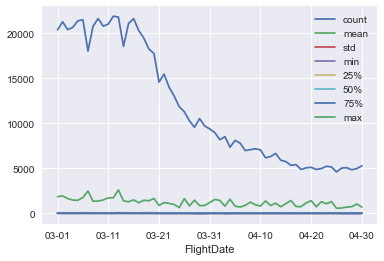

In [96]:
delays_per_day.plot()

In [97]:
from sklearn.preprocessing import StandardScaler

delays_per_day[StandardScaler().fit_transform(delays_per_day) > 3]

,count,mean,std,min,25%,50%,75%,max
FlightDate,,,,,,,,
03-13,21807.0,9.132572,45.256368,-31.0,-6.0,-3.0,6.0,2579.0
03-13,21807.0,9.132572,45.256368,-31.0,-6.0,-3.0,6.0,2579.0
03-13,21807.0,9.132572,45.256368,-31.0,-6.0,-3.0,6.0,2579.0


In [98]:
delays_per_day.std()

count    6570.827088
mean        3.288521
std         6.848043
min        12.105344
25%         1.271590
50%         1.017067
75%         1.776901
max       434.039229
dtype: float64

Se ve como el número de vuelos cayó en picado, pero de los retrasos no se ve por la escala

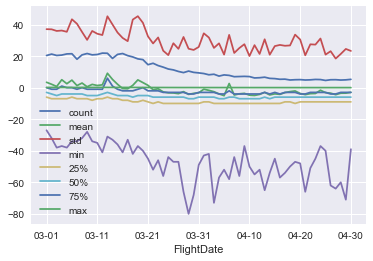

In [100]:
delays_per_day['count'] = delays_per_day['count'] / 1000
delays_per_day['max'] = delays_per_day['count'] / 150

delays_per_day.plot()

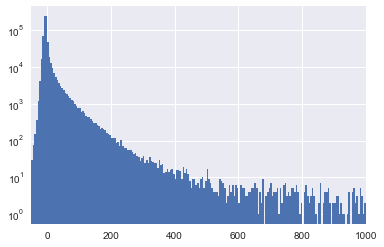

In [101]:
plt.hist(flights['DepDelay'].dropna(), bins= range(-50, 2500, 5));
plt.gca().set_xlim(-50, 1000)
plt.yscale('log')

## Group-wise operations and transformations

### Apply: General split-apply-combine

f = lambda x: x.describe()
grouped.apply(f)

In [102]:
# Diferencia en distancia entre el vuelo más corto y el más largo de cada avión
flights.groupby('Tail_Number')[['Distance']]\
       .apply(lambda df: df['Distance'].max() - df['Distance'].min())
# Se pone 'Distance' entre doble corchete en vez de simple para convertirlo en un DF en lugar de Series

Tail_Number
215NV      733.0
216NV     1015.0
217NV     1148.0
218NV     1228.0
219NV      400.0
           ...  
N998JE    1437.0
N998NN    2113.0
N999DN     818.0
N999JB     125.0
N999JQ    1693.0
Length: 5561, dtype: float64

In [103]:
def sample_ten_percent(series):
    return series.sample(len(series) // 10)

# Permite obtener "muestras estratificadas". Coges tus categorías de interés, y coges un 10% de cada una

stratified_sample = flights.groupby('Origin').apply(sample_ten_percent)
stratified_sample

FlightDate  DayOfWeek Reporting_Airline Tail_Number  \
Origin                                                               
ABE    31956   2020-04-30          4                OH         NaN   
       272458  2020-03-16          1                G4       224NV   
       507248  2020-03-30          1                OH         NaN   
       503430  2020-03-24          2                OH      N581NN   
       271374  2020-03-27          5                G4         NaN   
...                   ...        ...               ...         ...   
YUM    521673  2020-03-16          1                OO      N751SK   
       45354   2020-04-13          1                OO      N740EV   
       41941   2020-04-01          3                OO      N710SK   
       521680  2020-03-23          1                OO      N778SK   
       298877  2020-04-28          2                YV         NaN   

               Flight_Number_Reporting_Airline Origin  \
Origin                                                  
ABE    31956                              5314    ABE   
       272458                              273    ABE   
       507248                             5314    ABE   
       503430                             5231    ABE   
       271374                              291    ABE   
...                                        ...    ...   
YUM    521673                             2994    YUM   
       45354                              3029    YUM   
       41941                              3100    YUM   
       521680                             2994    YUM   
       298877                             5845    YUM   

                               OriginCityName OriginStateName  \
Origin                                                          
ABE    31956   Allentown/Bethlehem/Easton, PA    Pennsylvania   
       272458  Allentown/Bethlehem/Easton, PA    Pennsylvania   
       507248  Allentown/Bethlehem/Easton, PA    Pennsylvania   
       503430  Allentown/Bethlehem/Easton, PA    Pennsylvania   
       271374  Allentown/Bethlehem/Easton, PA    Pennsylvania   
...                                       ...             ...   
YUM    521673                        Yuma, AZ         Arizona   
       45354                         Yuma, AZ         Arizona   
       41941                         Yuma, AZ         Arizona   
       521680                        Yuma, AZ         Arizona   
       298877                        Yuma, AZ         Arizona   

               OriginCityMarketID Dest           DestCityName   DestStateName  \
Origin                                                                          
ABE    31956                30135  CLT          Charlotte, NC  North Carolina   
       272458               30135  SFB            Sanford, FL         Florida   
       507248               30135  CLT          Charlotte, NC  North Carolina   
       503430               30135  CLT          Charlotte, NC  North Carolina   
       271374               30135  PIE     St. Petersburg, FL         Florida   
...                           ...  ...                    ...             ...   
YUM    521673               33785  PHX            Phoenix, AZ         Arizona   
       45354                33785  DFW  Dallas/Fort Worth, TX           Texas   
       41941                33785  PHX            Phoenix, AZ         Arizona   
       521680               33785  PHX            Phoenix, AZ         Arizona   
       298877               33785  PHX            Phoenix, AZ         Arizona   

               DestCityMarketID  DepTime  DepDelay  AirTime  Distance  
Origin                                                                 
ABE    31956              31057      NaN       NaN      NaN     481.0  
       272458             34761    545.0     -15.0    115.0     882.0  
       507248             31057      NaN       NaN      NaN     481.0  
       503430             31057   1654.0     -10.0     88.0     481.0  
       271374             3319

### Column-wise and multiple function application

#### Suppressing the group keys

In [104]:
stratified_sample = flights.groupby('Origin', group_keys=False).apply(sample_ten_percent)
stratified_sample

,FlightDate,DayOfWeek,Reporting_Airline,Tail_Number,Flight_Number_Reporting_Airline,Origin,OriginCityName,OriginStateName,OriginCityMarketID,Dest,DestCityName,DestStateName,DestCityMarketID,DepTime,DepDelay,AirTime,Distance
13865,2020-04-23,4,MQ,N931AE,4041,ABE,"Allentown/Bethlehem/Easton, PA",Pennsylvania,30135,ORD,"Chicago, IL",Illinois,30977,709.0,-6.0,113.0,654.0
958,2020-04-17,5,G4,NaN,261,ABE,"Allentown/Bethlehem/Easton, PA",Pennsylvania,30135,PIE,"St. Petersburg, FL",Florida,33195,NaN,NaN,NaN,970.0
17648,2020-03-26,4,9E,NaN,5172,ABE,"Allentown/Bethlehem/Easton, PA",Pennsylvania,30135,ATL,"Atlanta, GA",Georgia,30397,NaN,NaN,NaN,692.0
306147,2020-03-03,2,MQ,N664MS,4052,ABE,"Allentown/Bethlehem/Easton, PA",Pennsylvania,30135,ORD,"Chicago, IL",Illinois,30977,1524.0,-8.0,110.0,654.0
270232,2020-03-20,5,G4,NaN,2516,ABE,"Allentown/Bethlehem/Easton, PA",Pennsylvania,30135,SAV,"Savannah, GA",Georgia,34685,NaN,NaN,NaN,669.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48895,2020-04-29,3,OO,N606SK,3029,YUM,"Yuma, AZ",Arizona,33785,DFW,"Dallas/Fort Worth, TX",Texas,30194,456.0,-4.0,132.0,1022.0
520802,2020-03-14,6,OO,N726SK,2967,YUM,"Yuma, AZ",Arizona,33785,PHX,"Phoenix, AZ",Arizona,30466,1310.0,430.0,28.0,160.0
47790,2020-04-24,5,OO,N758EV,3029,YUM,"Yuma, AZ",Arizona,33785,DFW,"Dallas/Fort Worth, TX",Texas,30194,451.0,-9.0,125.0,1022.0
298874,2020-04-25,6,YV,NaN,5845,YUM,"Yuma, AZ",Arizona,33785,PHX,"Phoenix, AZ",Arizona,30466,NaN,NaN,NaN,160.0


### Quantile and bucket analysis

In [105]:
pd.cut(flights['Distance'], bins=(0, 100, 600, 10000))

0         (600, 10000]
1         (600, 10000]
2           (100, 600]
3           (100, 600]
4           (100, 600]
              ...     
313377    (600, 10000]
313378      (100, 600]
313379      (100, 600]
313380      (100, 600]
313381    (600, 10000]
Name: Distance, Length: 961611, dtype: category
Categories (3, interval[int64]): [(0, 100] < (100, 600] < (600, 10000]]

In [106]:
# Sacar una serie de métricas clave para AirTime y DepDelay según agrupaciones por haul (short, medium, long)
flights.groupby(pd.cut(flights['Distance'], bins=(0, 100, 600, 10000)))[['AirTime', 'DepDelay']].agg(['mean', 'median', 'std', 'count'])

AirTime                            DepDelay         \
                    mean median        std   count      mean median   
Distance                                                              
(0, 100]       23.501723   23.0   4.502007    9864 -0.241962   -6.0   
(100, 600]     59.579465   59.0  18.119129  324582 -0.191152   -5.0   
(600, 10000]  155.623871  137.0  64.716901  385804  0.700379   -5.0   

                                 
                    std   count  
Distance                         
(0, 100]      38.953161    9890  
(100, 600]    33.674868  325087  
(600, 10000]  33.084590  386679

In [107]:
# Sin embargo, mejor partir la línea para que sea más legible. No hay reglas al respecto (más allá de no superar los 80 caracteres por línea)
# El "\" es para que no entienda el salto de línea
haul = pd.cut(flights['Distance'], bins=(0, 100, 600, 10000))
flights.groupby(haul)[['AirTime', 'DepDelay']]\
       .agg(['mean', 'median', 'std', 'count'])

AirTime                            DepDelay         \
                    mean median        std   count      mean median   
Distance                                                              
(0, 100]       23.501723   23.0   4.502007    9864 -0.241962   -6.0   
(100, 600]     59.579465   59.0  18.119129  324582 -0.191152   -5.0   
(600, 10000]  155.623871  137.0  64.716901  385804  0.700379   -5.0   

                                 
                    std   count  
Distance                         
(0, 100]      38.953161    9890  
(100, 600]    33.674868  325087  
(600, 10000]  33.084590  386679

### Example: Filling missing values with group-specific values

#### Exercise: 

Show cities by descending number of airports

In [108]:
flights.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 961611 entries, 0 to 313381
Data columns (total 17 columns):
 #   Column                           Non-Null Count   Dtype  
---  ------                           --------------   -----  
 0   FlightDate                       961611 non-null  object 
 1   DayOfWeek                        961611 non-null  int64  
 2   Reporting_Airline                961611 non-null  object 
 3   Tail_Number                      822783 non-null  object 
 4   Flight_Number_Reporting_Airline  961611 non-null  int64  
 5   Origin                           961611 non-null  object 
 6   OriginCityName                   961611 non-null  object 
 7   OriginStateName                  961611 non-null  object 
 8   OriginCityMarketID               961611 non-null  int64  
 9   Dest                             961611 non-null  object 
 10  DestCityName                     961611 non-null  object 
 11  DestStateName                    961611 non-null  object 
 12  De

In [109]:
option1 = flights.groupby('OriginCityName')['Origin'].nunique().sort_values(ascending=False)
option1
# La forma de interpretar esto a la hora de plantearlo es:
# 1) ¿Respecto a qué quiero agrupar? 'OriginCityName'
# 2) De todos esos campos, ¿qué me interesa? 'Origin'
# 3) De esa Series restante,¿qué necesito? Contar los valores únicos 'nunique()'
# 4) Por último, ¿cómo los ordeno? '.sort_values(ascending=False)'

OriginCityName
Washington, DC       2
Chicago, IL          2
Houston, TX          2
Mobile, AL           2
Phoenix, AZ          2
                    ..
Oakland, CA          1
Ogden, UT            1
Ogdensburg, NY       1
Oklahoma City, OK    1
Aberdeen, SD         1
Name: Origin, Length: 346, dtype: int64

In [110]:
option2 = flights[['OriginCityName', 'Origin']].drop_duplicates().groupby('OriginCityName').count().sort_values(by='Origin', ascending=False)
option2

,Origin
OriginCityName,
"New York, NY",2
"Chicago, IL",2
"Mobile, AL",2
"Phoenix, AZ",2
"Columbus, OH",2
...,...
"Gainesville, FL",1
"Fresno, CA",1
"Fort Wayne, IN",1


In [112]:
# La opción más retorcida
option3 = flights.groupby(['OriginCityName', 'Origin']).count().groupby('OriginCityName').count()
option3

,FlightDate,DayOfWeek,Reporting_Airline,Tail_Number,Flight_Number_Reporting_Airline,OriginStateName,OriginCityMarketID,Dest,DestCityName,DestStateName,DestCityMarketID,DepTime,DepDelay,AirTime,Distance
OriginCityName,,,,,,,,,,,,,,,
"Aberdeen, SD",1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
"Abilene, TX",1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
"Adak Island, AK",1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
"Aguadilla, PR",1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
"Akron, OH",1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
"Wilmington, NC",1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
"Worcester, MA",1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
"Wrangell, AK",1,1,1,1,1,1,1,1,1,1,1,1,1,1,1


#### Exercise

The list above doesn't correspond to our intuitive expectation, probably. That is because airports serving the same general area may be located within several different city limits. This is encapsulated by the "market" concept in commercial aviation.

Find the 10 markets with the most airports, and which airports are included in them.

Hint: there is an aggregation that we haven't used yet that can come in really handy. Search for it in the [list of functions in groupby](https://pandas.pydata.org/pandas-docs/stable/reference/groupby.html)

In [113]:
flights.sample(5)

,FlightDate,DayOfWeek,Reporting_Airline,Tail_Number,Flight_Number_Reporting_Airline,Origin,OriginCityName,OriginStateName,OriginCityMarketID,Dest,DestCityName,DestStateName,DestCityMarketID,DepTime,DepDelay,AirTime,Distance
58889,2020-03-03,2,AA,N902NN,1641,CLT,"Charlotte, NC",North Carolina,31057,MEM,"Memphis, TN",Tennessee,33244,1830.0,5.0,92.0,511.0
522235,2020-03-26,4,OO,N630SK,3015,ORD,"Chicago, IL",Illinois,30977,CID,"Cedar Rapids/Iowa City, IA",Iowa,31003,1824.0,-12.0,40.0,196.0
322130,2020-03-15,7,NK,N649NK,501,AUS,"Austin, TX",Texas,30423,LAX,"Los Angeles, CA",California,32575,2218.0,-3.0,171.0,1242.0
61154,2020-04-05,7,OO,N923EV,3766,ATL,"Atlanta, GA",Georgia,30397,ILM,"Wilmington, NC",North Carolina,32323,1003.0,-2.0,52.0,377.0
259027,2020-04-12,7,WN,N483WN,915,DAL,"Dallas, TX",Texas,30194,LAX,"Los Angeles, CA",California,32575,2024.0,24.0,180.0,1246.0


In [114]:
flights[flights['OriginCityName'] == 'New York, NY'].sample(5)

,FlightDate,DayOfWeek,Reporting_Airline,Tail_Number,Flight_Number_Reporting_Airline,Origin,OriginCityName,OriginStateName,OriginCityMarketID,Dest,DestCityName,DestStateName,DestCityMarketID,DepTime,DepDelay,AirTime,Distance
305421,2020-04-06,1,YX,NaN,4478,LGA,"New York, NY",New York,31703,XNA,"Fayetteville, AR",Arkansas,31834,NaN,NaN,NaN,1147.0
309028,2020-04-02,4,YX,N245JQ,5843,LGA,"New York, NY",New York,31703,ORF,"Norfolk, VA",Virginia,33667,NaN,NaN,NaN,296.0
252561,2020-03-02,1,F9,N301FR,2879,LGA,"New York, NY",New York,31703,MIA,"Miami, FL",Florida,32467,2245.0,-2.0,150.0,1096.0
147255,2020-03-17,2,B6,N659JB,575,JFK,"New York, NY",New York,31703,MSY,"New Orleans, LA",Louisiana,33495,1431.0,-9.0,173.0,1182.0
205599,2020-03-08,7,DL,N838DN,947,JFK,"New York, NY",New York,31703,PDX,"Portland, OR",Oregon,34057,754.0,-6.0,339.0,2454.0


In [115]:
flights.groupby('OriginCityMarketID')['Origin'].nunique().sort_values(ascending=False)

OriginCityMarketID
31703    6
32575    5
30852    3
32457    3
30721    3
        ..
33277    1
33290    1
33304    1
33316    1
30070    1
Name: Origin, Length: 328, dtype: int64

In [116]:
flights.groupby('OriginCityMarketID')['Origin']\
       .agg(['nunique', 'unique'])\
       .sort_values(by='nunique', ascending=False)\
       .head(10)

,nunique,unique
OriginCityMarketID,,
31703,6,"[JFK, LGA, HPN, EWR, SWF, ISP]"
32575,5,"[LAX, ONT, SNA, BUR, LGB]"
32457,3,"[SFO, SJC, OAK]"
30852,3,"[DCA, IAD, BWI]"
30721,3,"[PVD, BOS, MHT]"
30977,2,"[ORD, MDW]"
30194,2,"[DFW, DAL]"
31453,2,"[IAH, HOU]"
32467,2,"[MIA, FLL]"


## Pivot tables and Cross-tabulation

Es otra forma de expresar Groupbies y agregaciones. Sólo hay que pensar la forma final que querrás que tenga la tabla.

In [117]:
# Tiempo medio de vuelo para cada ruta (muchas aparecerán vacías porque serán rutas no realizadas)
flights.pivot_table(index='Origin', columns='Dest', values='AirTime')

Dest,ABE,ABI,ABQ,ABR,ABY,ACT,ACV,ACY,ADK,ADQ,AEX,AGS,ALB,ALO,AMA,ANC,APN,ASE,ATL,ATW,ATY,AUS,AVL,AVP,AZA,AZO,BDL,BET,BFF,BFL,BFM,BGM,BGR,BHM,BIL,BIS,BJI,BLI,BLV,BMI,BNA,BOI,BOS,BPT,BQK,BQN,BRD,BRO,BRW,BTM,BTR,BTV,BUF,BUR,BWI,BZN,CAE,CAK,CDC,CDV,CGI,CHA,CHO,CHS,CID,CIU,CKB,CLE,CLL,CLT,CMH,CMI,CMX,CNY,COD,COS,COU,CPR,CRP,CRW,CSG,CVG,CWA,CYS,DAB,DAL,DAY,DBQ,DCA,DDC,DEC,DEN,DFW,DHN,DIK,DLH,DRO,DRT,DSM,DTW,DVL,EAR,EAU,ECP,EGE,EKO,ELM,ELP,ERI,ESC,EUG,EVV,EWN,EWR,EYW,FAI,FAR,FAT,FAY,FCA,FLG,FLL,FNT,FSD,FSM,FWA,GCC,GCK,GEG,GFK,GGG,GJT,GNV,GPT,GRB,GRI,GRK,GRR,GSO,GSP,GTF,GTR,GUC,GUM,HDN,HGR,HHH,HIB,HLN,HNL,HOB,HOU,HPN,HRL,HSV,HTS,HVN,HYS,IAD,IAG,IAH,ICT,IDA,ILM,IMT,IND,INL,ISP,ITH,ITO,JAC,JAN,JAX,JFK,JLN,JMS,JNU,KOA,KTN,LAN,LAR,LAS,LAW,LAX,LBB,LBE,LBF,LBL,LCH,LCK,LEX,LFT,LGA,LGB,LIH,LIT,LNK,LRD,LSE,LWB,LWS,LYH,MAF,MBS,MCI,MCO,MDT,MDW,MEI,MEM,MFE,MFR,MGM,MHK,MHT,MIA,MKE,MKG,MLB,MLI,MLU,MMH,MOB,MOT,MQT,MRY,MSN,MSO,MSP,MSY,MTJ,MYR,OAJ,OAK,OGD,OGG,OGS,OKC,OMA,OME,ONT,ORD,ORF,ORH,OTH,OTZ,OWB,PAE,PAH,PBG,PBI,PDX,PGD,PHF,PHL,PHX,PIA,PIB,PIE,PIH,PIR,PIT,PLN,PNS,PPG,PRC,PSC,PSE,PSG,PSM,PSP,PUB,PVD,PVU,PWM,RAP,RDD,RDM,RDU,RFD,RHI,RIC,RIW,RKS,RNO,ROA,ROC,ROW,RST,RSW,SAF,SAN,SAT,SAV,SBA,SBN,SBP,SCC,SCE,SCK,SDF,SEA,SFB,SFO,SGF,SGU,SHD,SHR,SHV,SIT,SJC,SJT,SJU,SLC,SLN,SMF,SMX,SNA,SPI,SPN,SPS,SRQ,STC,STL,STS,STT,STX,SUN,SUX,SWF,SWO,SYR,TLH,TOL,TPA,TRI,TTN,TUL,TUS,TVC,TWF,TXK,TYR,TYS,USA,VEL,VLD,VPS,WRG,XNA,XWA,YAK,YUM
Origin,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
ABE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,106.163934,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,101.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,89.436975,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,78.773913,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,139.833333,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,112.064516,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,134.947368,NaN,NaN,NaN,NaN,NaN,136.5625,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,95.8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,122.058824,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,136.142857,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ABI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,34.286792,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN

In [118]:
# Media de los retrasos de cada aerolínea en función del día de la semana (la 'media' es la función por defecto)
flights.pivot_table(index='Reporting_Airline', columns='DayOfWeek', values='DepDelay')

DayOfWeek,1,2,3,4,5,6,7
Reporting_Airline,,,,,,,
9E,-1.707888,-2.419213,-1.649101,-1.063947,5.429478,-0.854762,-2.967217
AA,-0.224525,-0.559173,2.343172,1.606453,3.250790,0.469832,0.539833
AS,-3.028130,-3.333931,-3.049471,-3.571046,-0.464286,-0.625544,0.015668
B6,-0.271827,-2.905212,-1.211667,-3.060995,1.330606,1.251513,1.907815
DL,0.398689,-0.788563,2.626048,2.006141,2.021452,0.822409,0.357781
EV,-3.330180,-4.691929,-2.401846,-4.482199,-1.713975,-3.783871,-3.053221
F9,0.310252,-0.458415,-0.026334,0.439729,4.596370,1.902635,0.082505
G4,5.367169,-1.790609,0.089943,9.346806,7.529054,4.461660,4.709606
HA,-0.941385,8.142466,-1.621141,-2.818182,-2.800826,-2.882759,-3.590426


In [119]:
flights.pivot_table(index='Reporting_Airline',
                    columns='DayOfWeek',
                    values='DepDelay',
                    aggfunc=['mean', 'std'])

mean                                                    \
DayOfWeek                 1         2         3         4         5         6   
Reporting_Airline                                                               
9E                -1.707888 -2.419213 -1.649101 -1.063947  5.429478 -0.854762   
AA                -0.224525 -0.559173  2.343172  1.606453  3.250790  0.469832   
AS                -3.028130 -3.333931 -3.049471 -3.571046 -0.464286 -0.625544   
B6                -0.271827 -2.905212 -1.211667 -3.060995  1.330606  1.251513   
DL                 0.398689 -0.788563  2.626048  2.006141  2.021452  0.822409   
EV                -3.330180 -4.691929 -2.401846 -4.482199 -1.713975 -3.783871   
F9                 0.310252 -0.458415 -0.026334  0.439729  4.596370  1.902635   
G4                 5.367169 -1.790609  0.089943  9.346806  7.529054  4.461660   
HA                -0.941385  8.142466 -1.621141 -2.818182 -2.800826 -2.882759   
MQ                -2.696903 -3.062567 -1.486822 -0.437968  0.932697 -0.627907   
NK                 4.820390  3.690234  4.221722  3.396692  5.467430  4.041904   
OH                 4.610658  0.932104  2.290122  1.276879  3.315338 -0.138889   
OO                 0.334075 -1.242576  0.626029  1.556310  3.820079  0.794643   
UA                -1.800590 -0.736026 -1.412125 -0.300822  5.105694  1.248512   
WN                -1.234474 -1.054350 -1.022444 -0.083004  0.196322 -0.215981   
YV                 2.203698 -0.400274  5.694783  3.696464  3.986076  2.892055   
YX                -3.736144 -4.222489 -3.384430 -3.622343  1.810401 -2.532226   

                                   std                                   \
DayOfWeek                 7          1          2          3          4   
Reporting_Airline                                                         
9E                -2.967217  27.378469  22.735001  24.265024  27.896291   
AA                 0.539833  36.850476  38.394845  43.942001  39.602546   
AS                 0.015668  24.525450  25.148574  23.767425  22.458479   
B6                 1.907815  28.692318  25.973055  29.165235  22.653290   
DL                 0.357781  31.174191  25.651890  40.182069  34.454294   
EV                -3.053221  30.939230  19.528403  24.632177  18.828120   
F9                 0.082505  31.100377  28.302952  26.905792  33.360673   
G4                 4.709606  59.924418  29.703072  43.548383  74.003920   
HA                -3.590426  23.807490  52.786311  34.410683  15.332077   
MQ                -2.359440  29.584429  29.135554  24.732707  39.335503   
NK                 3.947994  30.624811  34.708244  42.716226  38.861156   
OH                 0.850226  49.252463  42.853019  44.563882  38.179490   
OO                 0.866443  38.638619  34.428049  44.940604  44.978355   
UA                 0.397874  29.802359  33.774344  24.762971  35.510562   
WN                -0.459891  12.606486  13.704918  12.347242  16.421916   
YV                 2.640602  44.576030  47.433572  46.082521  43.438379   
YX                -2.537602  18.515222  21.758533  19.469832  25.391566   

                                                    
DayOfWeek                  5          6          7  
Reporting_Airline                                   
9E                 59.671708  31.148983  19.648969  
AA                 46.759397  48.251405  36.691214  
AS                 27.957177  30.726813  29.769937  
B6                 35.296841  31.399115  33.800864  
DL                 31.398935  31.047499  27.715521  
EV                 23.742928  38.141429  24.130619  
F9                 36.359203  35.993060  28.969473  
G4                 58.085752  45.444294  55.946806  
HA                 13.881604  17.091106  13.463111  
MQ                 28.736956  33.498741  28.399545  
NK                 49.874717  37.200202  41.458964  
OH                 34.944033  32.981326  43.831198  
OO                 48.271452  42.819333  42.201047  
UA                 41.212541  31.500569  30.897164  


In [122]:
flights.pivot_table(index=['Reporting_Airline', 'Flight_Number_Reporting_Airline'],
                    columns='DayOfWeek',
                    values=['DepDelay', 'Distance'],
                    aggfunc=['mean', 'std'])

mean             \
                                                    DepDelay              
DayOfWeek                                                  1          2   
Reporting_Airline Flight_Number_Reporting_Airline                         
9E                4628                                   NaN        NaN   
                  4629                             -7.500000   0.500000   
                  4633                                   NaN        NaN   
                  4634                             -3.500000  -5.625000   
                  4635                             -6.500000 -10.000000   
...                                                      ...        ...   
YX                6139                             -5.666667  -4.833333   
                  6140                             -3.000000  16.000000   
                  6141                            -14.000000 -16.000000   
                  6142                             27.428571  -8.625000   
                  6143                             -9.000000  -9.000000   

                                                                         \
                                                                          
DayOfWeek                                                  3          4   
Reporting_Airline Flight_Number_Reporting_Airline                         
9E                4628                                   NaN        NaN   
                  4629                            -11.000000  -2.500000   
                  4633                                   NaN        NaN   
                  4634                             -6.000000  16.200000   
                  4635                             -8.000000 -22.000000   
...                                                      ...        ...   
YX                6139                             -6.833333  -8.250000   
                  6140                            -10.500000 -11.333333   
                  6141                            -10.500000 -10.333333   
                  6142                             -5.833333  -5.166667   
                  6143                            -11.000000  -7.500000   

                                                                            \
                                                                             
DayOfWeek                                               5     6          7   
Reporting_Airline Flight_Number_Reporting_Airline                            
9E                4628                                NaN   NaN        NaN   
                  4629                             -4.500 -10.0 -16.500000   
                  4633                                NaN   NaN        NaN   
                  4634                             -8.250  -6.5  -4.625000   
                  4635                             -7.500 -14.0  -9.500000   
...                                                   ...   ...        ...   
YX                6139                             -2.400  -7.0  11.250000   
                  6140                             31.000   NaN  -6.400000   
                  6141                             -0.500  -8.5  45.000000   
                  6142                             -0.375   7.8  -6.666667   
                  6143                             -5.500  -6.0        NaN   

                                                                           \
                                                     Distance               
DayOfWeek                                                   1           2   
Reporting_Airline Flight_Number_Reporting_Airline                           
9E                4628                             610.000000  610.000000   
                  4629                             500.000000  500.000000   
                  4633                                    NaN         NaN   
                  4634                             645.000000  645.000000   
                 

In [123]:
%%time

flights.pivot_table(index=['Reporting_Airline', 'Flight_Number_Reporting_Airline'],
                    columns='DayOfWeek',
                    values=['DepDelay', 'Distance'],
                    aggfunc=['mean', 'std'])

CPU times: user 1.96 s, sys: 3.31 ms, total: 1.97 s
Wall time: 2.43 s


mean             \
                                                    DepDelay              
DayOfWeek                                                  1          2   
Reporting_Airline Flight_Number_Reporting_Airline                         
9E                4628                                   NaN        NaN   
                  4629                             -7.500000   0.500000   
                  4633                                   NaN        NaN   
                  4634                             -3.500000  -5.625000   
                  4635                             -6.500000 -10.000000   
...                                                      ...        ...   
YX                6139                             -5.666667  -4.833333   
                  6140                             -3.000000  16.000000   
                  6141                            -14.000000 -16.000000   
                  6142                             27.428571  -8.625000   
                  6143                             -9.000000  -9.000000   

                                                                         \
                                                                          
DayOfWeek                                                  3          4   
Reporting_Airline Flight_Number_Reporting_Airline                         
9E                4628                                   NaN        NaN   
                  4629                            -11.000000  -2.500000   
                  4633                                   NaN        NaN   
                  4634                             -6.000000  16.200000   
                  4635                             -8.000000 -22.000000   
...                                                      ...        ...   
YX                6139                             -6.833333  -8.250000   
                  6140                            -10.500000 -11.333333   
                  6141                            -10.500000 -10.333333   
                  6142                             -5.833333  -5.166667   
                  6143                            -11.000000  -7.500000   

                                                                            \
                                                                             
DayOfWeek                                               5     6          7   
Reporting_Airline Flight_Number_Reporting_Airline                            
9E                4628                                NaN   NaN        NaN   
                  4629                             -4.500 -10.0 -16.500000   
                  4633                                NaN   NaN        NaN   
                  4634                             -8.250  -6.5  -4.625000   
                  4635                             -7.500 -14.0  -9.500000   
...                                                   ...   ...        ...   
YX                6139                             -2.400  -7.0  11.250000   
                  6140                             31.000   NaN  -6.400000   
                  6141                             -0.500  -8.5  45.000000   
                  6142                             -0.375   7.8  -6.666667   
                  6143                             -5.500  -6.0        NaN   

                                                                           \
                                                     Distance               
DayOfWeek                                                   1           2   
Reporting_Airline Flight_Number_Reporting_Airline                           
9E                4628                             610.000000  610.000000   
                  4629                             500.000000  500.000000   
                  4633                                    NaN         NaN   
                  4634                             645.000000  645.000000   
                 

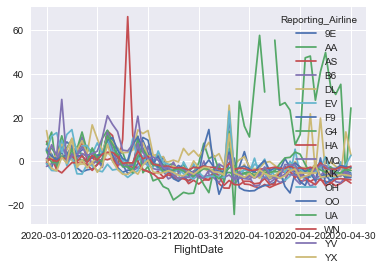

In [128]:
# Este tipo de informes es muy potente combinándolo con los plots "wrapper":
delays = flights.pivot_table(columns='Reporting_Airline', values='DepDelay', index=['FlightDate'])
delays.plot()

#### Exercise:

How do the delays stack over the course of the day? We are going to look at it by examining the distribution of delays for each hour of the day. 

* Calculate minimum, 25th percentile, median, average, 75th percentile, and maximum delay for each hour of the day.

In [142]:
flights.columns

Index(['FlightDate', 'DayOfWeek', 'Reporting_Airline', 'Tail_Number',
       'Flight_Number_Reporting_Airline', 'Origin', 'OriginCityName',
       'OriginStateName', 'OriginCityMarketID', 'Dest', 'DestCityName',
       'DestStateName', 'DestCityMarketID', 'DepTime', 'DepDelay', 'AirTime',
       'Distance'],
      dtype='object')

In [144]:
flights[['DepTime']].sample(5)

,DepTime
52034,1413.0
371045,505.0
418488,1805.0
34066,648.0
224098,919.0


In [145]:
IFrame('readme.html', 800, 600)

# DepTime	Actual Departure Time (local time: hhmm)

In [148]:
my25th = lambda x: np.percentile(x,25)

delays = flights.pivot_table(columns='Reporting_Airline',
                             values='DepDelay',
                             index=['DepTime'],
                             aggfunc=['min', my25th, 'median', 'mean', 'max'])
delays

min                                                       \
Reporting_Airline    9E    AA    AS    B6    DL  EV    F9     G4    HA    MQ   
DepTime                                                                        
1.0                 NaN  -8.0 -14.0   2.0  -9.0 NaN  -5.0    NaN   NaN   NaN   
2.0                 NaN  -8.0  32.0   3.0   7.0 NaN  -4.0  150.0   NaN   NaN   
3.0                27.0  -6.0   NaN   4.0  -2.0 NaN  -2.0    NaN   NaN   NaN   
4.0                 NaN  -5.0  44.0 -26.0  29.0 NaN   9.0    NaN   NaN   NaN   
5.0                 NaN  -4.0 -15.0   6.0   6.0 NaN -16.0    NaN  45.0   NaN   
...                 ...   ...   ...   ...   ...  ..   ...    ...   ...   ...   
2356.0              NaN -13.0   1.0  -3.0  -3.0 NaN  -5.0  181.0   NaN   NaN   
2357.0              NaN -12.0  22.0  -2.0  -2.0 NaN  -9.0   73.0   NaN  82.0   
2358.0              NaN -11.0   NaN  -1.0  -1.0 NaN -11.0    NaN   NaN   NaN   
2359.0              NaN -10.0  59.0   0.0  -6.0 NaN  -7.0    NaN   NaN   NaN   
2400.0              NaN -17.0   NaN   1.0  -5.0 NaN  -6.0  177.0   NaN  85.0   

                                                              <lambda>         \
Reporting_Airline    NK     OH     OO    UA     WN     YV  YX       9E     AA   
DepTime                                                                         
1.0                 2.0  231.0    NaN -13.0  101.0  205.0 NaN      NaN  -8.00   
2.0                 3.0  113.0   87.0 -13.0   67.0    NaN NaN      NaN  -7.00   
3.0                 4.0   97.0    NaN -12.0  103.0  345.0 NaN     27.0  -3.75   
4.0               -26.0  104.0  249.0   9.0   69.0    NaN NaN      NaN  -3.25   
5.0                 6.0   90.0   95.0 -10.0   95.0    NaN NaN      NaN  -0.50   
...                 ...    ...    ...   ...    ...    ...  ..      ...    ...   
2356.0             -3.0  106.0   17.0  -3.0   61.0  205.0 NaN      NaN -12.00   
2357.0            -13.0    NaN   33.0 -13.0   62.0   -1.0 NaN      NaN  -8.00   
2358.0             -1.0    NaN  187.0  -1.0    NaN    3.0 NaN      NaN -10.00   
2359.0              0.0    NaN   59.0  -6.0   94.0  274.0 NaN      NaN  -7.00   
2400.0             65.0    NaN    NaN   NaN    NaN    NaN NaN      NaN  -9.00   

                                                                           \
Reporting_Airline     AS   B6     DL  EV    F9     G4    HA     MQ     NK   
DepTime                                                                     
1.0               -14.00  2.0  -4.00 NaN -4.00    NaN   NaN    NaN   3.00   
2.0                32.00  3.0  24.50 NaN -3.75  150.0   NaN    NaN  21.50   
3.0                  NaN  5.0   3.75 NaN -2.00    NaN   NaN    NaN  46.00   
4.0                44.00  7.0  29.00 NaN  9.00    NaN   NaN    NaN -11.00   
5.0               -15.00  6.0  10.00 NaN -8.00    NaN  45.0    NaN  15.75   
...                  ...  ...    ...  ..   ...    ...   ...    ...    ...   
2356.0              9.75 -3.0  -3.00 NaN -4.00  181.0   NaN    NaN  -3.00   
2357.0             22.00 -2.0  -1.00 NaN -7.50   86.0   NaN  144.5  -2.00   
2358.0               NaN -1.0   0.00 NaN -7.00    NaN   NaN    NaN  -1.00   
2359.0             69.00  0.0   0.00 NaN -5.25    NaN   NaN    NaN   2.00   
2400.0               NaN  1.0   0.00 NaN -6.00  177.0   NaN   85.0  77.00   

                                                            median             \
Reporting_Airline      OH     OO     UA      WN      YV  YX     9E   AA    AS   
DepTime                                                                         
1.0                254.75    NaN  -4.00  101.00  276.50 NaN    NaN -6.0 -14.0   
2.0                137.75  112.0 -13.00   68.25     NaN NaN    NaN -3.0  32.0   
3.0                167.75    NaN   6.00  103.00  345.00 NaN   27.0 -2.0   NaN   
4.0                106.50  249.0  11.25   69.00     NaN NaN    NaN -1.0  44.0   
5.0                 90.00   95.0   0.00   95.00     NaN NaN    NaN  0.0 -15.0   
...                   ...    ...    .

In [150]:
my25th = lambda x: np.percentile(x,25)
my75th = lambda x: np.percentile(x,75)

delays = flights.pivot_table(columns='Reporting_Airline',
                             values='DepDelay',
                             index=['DepTime'],
                             aggfunc=['min', my25th, 'median', 'mean', my75th, 'max'])
delays

InvalidIndexError: Reindexing only valid with uniquely valued Index objects

In [151]:
delays = flights.pivot_table(columns='Reporting_Airline',
                             values='DepDelay',
                             index=['DepTime'],
                             aggfunc=['describe'])
delays

describe                                                   \
                       25%                                                    
Reporting_Airline       9E     AA     AS   B6     DL  EV    F9     G4    HA   
DepTime                                                                       
1.0                    NaN  -8.00 -14.00  2.0  -4.00 NaN -4.00    NaN   NaN   
2.0                    NaN  -7.00  32.00  3.0  24.50 NaN -3.75  150.0   NaN   
3.0                   27.0  -3.75    NaN  5.0   3.75 NaN -2.00    NaN   NaN   
4.0                    NaN  -3.25  44.00  7.0  29.00 NaN  9.00    NaN   NaN   
5.0                    NaN  -0.50 -15.00  6.0  10.00 NaN -8.00    NaN  45.0   
...                    ...    ...    ...  ...    ...  ..   ...    ...   ...   
2356.0                 NaN -12.00   9.75 -3.0  -3.00 NaN -4.00  181.0   NaN   
2357.0                 NaN  -8.00  22.00 -2.0  -1.00 NaN -7.50   86.0   NaN   
2358.0                 NaN -10.00    NaN -1.0   0.00 NaN -7.00    NaN   NaN   
2359.0                 NaN  -7.00  69.00  0.0   0.00 NaN -5.25    NaN   NaN   
2400.0                 NaN  -9.00    NaN  1.0   0.00 NaN -6.00  177.0   NaN   

                                                                           \
                                                                            
Reporting_Airline     MQ     NK      OH     OO     UA      WN      YV  YX   
DepTime                                                                     
1.0                  NaN   3.00  254.75    NaN  -4.00  101.00  276.50 NaN   
2.0                  NaN  21.50  137.75  112.0 -13.00   68.25     NaN NaN   
3.0                  NaN  46.00  167.75    NaN   6.00  103.00  345.00 NaN   
4.0                  NaN -11.00  106.50  249.0  11.25   69.00     NaN NaN   
5.0                  NaN  15.75   90.00   95.0   0.00   95.00     NaN NaN   
...                  ...    ...     ...    ...    ...     ...     ...  ..   
2356.0               NaN  -3.00  106.00   17.0  -3.00   63.50  205.00 NaN   
2357.0             144.5  -2.00     NaN  105.0  -2.00   84.50   -0.75 NaN   
2358.0               NaN  -1.00     NaN  187.0  -1.00     NaN    3.00 NaN   
2359.0               NaN   2.00     NaN   89.0   0.00  109.00  274.00 NaN   
2400.0              85.0  77.00     NaN    NaN    NaN     NaN     NaN NaN   

                                                                             \
                    50%                                                       
Reporting_Airline    9E   AA    AS    B6    DL  EV   F9     G4    HA     MQ   
DepTime                                                                       
1.0                 NaN -6.0 -14.0   2.0  -4.0 NaN -4.0    NaN   NaN    NaN   
2.0                 NaN -3.0  32.0   3.0  42.0 NaN -3.5  150.0   NaN    NaN   
3.0                27.0 -2.0   NaN  17.0   9.5 NaN -2.0    NaN   NaN    NaN   
4.0                 NaN -1.0  44.0   9.0  29.0 NaN  9.0    NaN   NaN    NaN   
5.0                 NaN  0.0 -15.0   6.0  55.0 NaN  0.0    NaN  45.0    NaN   
...                 ...  ...   ...   ...   ...  ..  ...    ...   ...    ...   
2356.0              NaN -9.0  18.5  -3.0  -2.0 NaN -3.0  181.0   NaN    NaN   
2357.0              NaN -2.0  22.0  -2.0   0.0 NaN -6.0   99.0   NaN  207.0   
2358.0              NaN -1.0   NaN  -1.0  15.5 NaN -3.0    NaN   NaN    NaN   
2359.0              NaN -6.0  79.0   0.0   1.0 NaN -3.5    NaN   NaN    NaN   
2400.0              NaN -8.0   NaN   1.0   5.0 NaN -6.0  177.0   NaN   85.0   

                                                                           \
                                                                75%         
Reporting_Airline    NK     OH     OO    UA     WN     YV  YX    9E    AA   
DepTime                                                                     
1.0                 4.0  278.5    NaN   6.0  101.0  348.0 NaN   NaN  14.0   
2.0                40.0  162.5  137.0 -13.0   69.5    NaN NaN   NaN   7.0   
3.0                88.0  238

#### Exercise

We are also interested in examining how the home base influences delays. Calculate the delay distribution (minimum, 25th percentile, median, average, 75th percentile, and maximum) for every airport. Then show the values for the 10 airports with the most flights.

In [160]:
# REPASAR, ESTÄ MAL !!!

delays_HomeBase = flights.pivot_table(columns='Origin',
                                      values='DepDelay',
                                      index=['Origin'],
                                      aggfunc=['describe'])
delays_HomeBase.sort_values(by=('describe', 'count'), ascending=False).head(10)

ValueError: Grouper for 'Origin' not 1-dimensional

#### Take home project

If we wanted to do some machine learning, we would need to create as many informative features as we thought could be useful. This is called Feature Engineering.

Discrete data would most often be transformed by [one-hot encoding](https://hackernoon.com/what-is-one-hot-encoding-why-and-when-do-you-have-to-use-it-e3c6186d008f), which is [very easy to do in pandas](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.get_dummies.html).

![One Hot Encoding](https://hackernoon.com/photos/4HK5qyMbWfetPhAavzyTZrEb90N2-3o23tie)

With high cardinality discrete data such as airports or, especially, tail numbers, we would be left with many variables, most of which would not be very informative. There are [several options](https://www.datacamp.com/community/tutorials/encoding-methodologies) to deal with this. The most sophisticated is probably vector encoding, but we can do with a very simple approach: [target encoding](https://maxhalford.github.io/blog/target-encoding-done-the-right-way/).

This means that we substitute each value of the discrete variable by the average or median value of the target variable for that value of the independent discrete variable. However! if we want to use this in machine learning for predictions, we would need to use only the previous values.

Target encode the variable 'Origin' and the 'Tail_Number' variable, using for each cell only the values that were available the previous day. In other words: create a `median_delay_origin` variable that contains, for each record, the median delay at that airport _up to the previous day_. Create another one, `median_delay_plane`, with Tail_Number.